In [1]:
from raw_io import read_darkframes
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive
import matplotlib
import numba
interactive(True)
%matplotlib notebook

@numba.njit(parallel=True)
def std_along_first_axis(array):
    res = np.zeros(array.shape[1:])
    for i in numba.prange(array.shape[1]):
        for j in range(array.shape[2]):
            res[i, j] = np.std(array[:,i,j])
    return res

@numba.njit(parallel=True)
def std_along_second_axis(array):
    res = np.zeros(array.shape[1:])
    for i in numba.prange(array.shape[1]):
        for j in range(array.shape[2]):
            res[i, j] = np.std(array[:,i,j])
    return res

s = (11,6)


def iqr(data, axis=None):
    return np.quantile(data, 0.75, axis=axis) - np.quantile(data, 0.25, axis=axis)


def frame_fig(frame, title = None, title_prefix = None, nσ = 3, auto_range=False, **kwargs):
    if isinstance(frame, tuple):
        frame, meta = frame
        if title is None:
            title = f"ms = {meta['exposure_ms']}, gain = {meta['gain']}, n = {meta['n_frames']}"
    if title is not None and title_prefix is not None:
        title = title_prefix + " " + title
    plt.figure(figsize=s)
    μ = np.median(frame)
    σ = iqr(frame)
    if auto_range:
        plt.imshow(frame, **kwargs)
    else:
        plt.imshow(frame, vmin = μ - nσ * σ, vmax = μ + nσ * σ, **kwargs)
    plt.colorbar()
    plt.title(title)
    plt.tight_layout()

In [2]:
f = "/home/robin/darkframe_3ms_4x.blob.zst"
# darkframe_3ms_4x.blob.zst
# darkframe_3ms_4x.blob.zst
# darkframe_11ms_1x.blob.zst
# darkframe_11ms_1x.blob.zst

darkframes = read_darkframes(f, count=None)
print(darkframes.shape)
mean_darkframes = np.fromfile(f + "_mean", dtype=np.float32).reshape(darkframes.shape[1:])
std_darkframes = np.fromfile(f + "_std", dtype=np.float32).reshape(darkframes.shape[1:])**0.5

[CornerMarker(frame_number=250, wrsel=9, marker=85), CornerMarker(frame_number=24, wrsel=161, marker=155), CornerMarker(frame_number=34, wrsel=146, marker=19), CornerMarker(frame_number=33, wrsel=242, marker=27)]
[CornerMarker(frame_number=26, wrsel=129, marker=162), CornerMarker(frame_number=28, wrsel=65, marker=154), CornerMarker(frame_number=33, wrsel=18, marker=2), CornerMarker(frame_number=6, wrsel=16, marker=87)]
[CornerMarker(frame_number=6, wrsel=16, marker=89), CornerMarker(frame_number=31, wrsel=65, marker=242), CornerMarker(frame_number=35, wrsel=98, marker=84), CornerMarker(frame_number=35, wrsel=2, marker=50)]
[CornerMarker(frame_number=31, wrsel=2, marker=7), CornerMarker(frame_number=31, wrsel=18, marker=7), CornerMarker(frame_number=34, wrsel=2, marker=28), CornerMarker(frame_number=5, wrsel=112, marker=89)]
[CornerMarker(frame_number=250, wrsel=9, marker=85), CornerMarker(frame_number=250, wrsel=9, marker=85), CornerMarker(frame_number=250, wrsel=14, marker=85), Corner

17
[CornerMarker(frame_number=28, wrsel=14, marker=85), CornerMarker(frame_number=28, wrsel=14, marker=85), CornerMarker(frame_number=28, wrsel=3, marker=85), CornerMarker(frame_number=28, wrsel=3, marker=85)]
[CornerMarker(frame_number=27, wrsel=14, marker=170), CornerMarker(frame_number=27, wrsel=14, marker=170), CornerMarker(frame_number=27, wrsel=14, marker=170), CornerMarker(frame_number=27, wrsel=14, marker=170)]
18
[CornerMarker(frame_number=30, wrsel=3, marker=85), CornerMarker(frame_number=30, wrsel=3, marker=85), CornerMarker(frame_number=30, wrsel=4, marker=85), CornerMarker(frame_number=30, wrsel=4, marker=85)]
[CornerMarker(frame_number=29, wrsel=3, marker=170), CornerMarker(frame_number=29, wrsel=3, marker=170), CornerMarker(frame_number=29, wrsel=3, marker=170), CornerMarker(frame_number=29, wrsel=3, marker=170)]
19
[CornerMarker(frame_number=32, wrsel=4, marker=85), CornerMarker(frame_number=32, wrsel=4, marker=85), CornerMarker(frame_number=32, wrsel=9, marker=85), Cor

38
[CornerMarker(frame_number=70, wrsel=3, marker=85), CornerMarker(frame_number=70, wrsel=3, marker=85), CornerMarker(frame_number=70, wrsel=4, marker=85), CornerMarker(frame_number=70, wrsel=4, marker=85)]
[CornerMarker(frame_number=69, wrsel=3, marker=170), CornerMarker(frame_number=69, wrsel=3, marker=170), CornerMarker(frame_number=69, wrsel=3, marker=170), CornerMarker(frame_number=69, wrsel=3, marker=170)]
39
[CornerMarker(frame_number=72, wrsel=4, marker=85), CornerMarker(frame_number=72, wrsel=4, marker=85), CornerMarker(frame_number=72, wrsel=9, marker=85), CornerMarker(frame_number=72, wrsel=9, marker=85)]
[CornerMarker(frame_number=71, wrsel=4, marker=170), CornerMarker(frame_number=71, wrsel=4, marker=170), CornerMarker(frame_number=71, wrsel=4, marker=170), CornerMarker(frame_number=71, wrsel=4, marker=170)]
40
[CornerMarker(frame_number=74, wrsel=9, marker=85), CornerMarker(frame_number=74, wrsel=9, marker=85), CornerMarker(frame_number=74, wrsel=14, marker=85), CornerMa

59
[CornerMarker(frame_number=112, wrsel=4, marker=85), CornerMarker(frame_number=112, wrsel=4, marker=85), CornerMarker(frame_number=112, wrsel=9, marker=85), CornerMarker(frame_number=112, wrsel=9, marker=85)]
[CornerMarker(frame_number=111, wrsel=4, marker=170), CornerMarker(frame_number=111, wrsel=4, marker=170), CornerMarker(frame_number=111, wrsel=4, marker=170), CornerMarker(frame_number=111, wrsel=4, marker=170)]
60
[CornerMarker(frame_number=114, wrsel=9, marker=85), CornerMarker(frame_number=114, wrsel=9, marker=85), CornerMarker(frame_number=114, wrsel=14, marker=85), CornerMarker(frame_number=114, wrsel=14, marker=85)]
[CornerMarker(frame_number=113, wrsel=9, marker=170), CornerMarker(frame_number=113, wrsel=9, marker=170), CornerMarker(frame_number=113, wrsel=9, marker=170), CornerMarker(frame_number=113, wrsel=9, marker=170)]
61
[CornerMarker(frame_number=116, wrsel=14, marker=85), CornerMarker(frame_number=116, wrsel=14, marker=85), CornerMarker(frame_number=116, wrsel=3

80
[CornerMarker(frame_number=154, wrsel=9, marker=85), CornerMarker(frame_number=154, wrsel=9, marker=85), CornerMarker(frame_number=154, wrsel=14, marker=85), CornerMarker(frame_number=154, wrsel=14, marker=85)]
[CornerMarker(frame_number=153, wrsel=9, marker=170), CornerMarker(frame_number=153, wrsel=9, marker=170), CornerMarker(frame_number=153, wrsel=9, marker=170), CornerMarker(frame_number=153, wrsel=9, marker=170)]
81
[CornerMarker(frame_number=156, wrsel=14, marker=85), CornerMarker(frame_number=156, wrsel=14, marker=85), CornerMarker(frame_number=156, wrsel=3, marker=85), CornerMarker(frame_number=156, wrsel=3, marker=85)]
[CornerMarker(frame_number=155, wrsel=14, marker=170), CornerMarker(frame_number=155, wrsel=14, marker=170), CornerMarker(frame_number=155, wrsel=14, marker=170), CornerMarker(frame_number=155, wrsel=14, marker=170)]
82
[CornerMarker(frame_number=158, wrsel=3, marker=85), CornerMarker(frame_number=158, wrsel=3, marker=85), CornerMarker(frame_number=158, wrs

101
[CornerMarker(frame_number=196, wrsel=14, marker=85), CornerMarker(frame_number=196, wrsel=14, marker=85), CornerMarker(frame_number=196, wrsel=3, marker=85), CornerMarker(frame_number=196, wrsel=3, marker=85)]
[CornerMarker(frame_number=195, wrsel=14, marker=170), CornerMarker(frame_number=195, wrsel=14, marker=170), CornerMarker(frame_number=195, wrsel=14, marker=170), CornerMarker(frame_number=195, wrsel=14, marker=170)]
102
[CornerMarker(frame_number=198, wrsel=3, marker=85), CornerMarker(frame_number=198, wrsel=3, marker=85), CornerMarker(frame_number=198, wrsel=4, marker=85), CornerMarker(frame_number=198, wrsel=4, marker=85)]
[CornerMarker(frame_number=197, wrsel=3, marker=170), CornerMarker(frame_number=197, wrsel=3, marker=170), CornerMarker(frame_number=197, wrsel=3, marker=170), CornerMarker(frame_number=197, wrsel=3, marker=170)]
103
[CornerMarker(frame_number=200, wrsel=4, marker=85), CornerMarker(frame_number=200, wrsel=4, marker=85), CornerMarker(frame_number=200, wr

122
[CornerMarker(frame_number=238, wrsel=3, marker=85), CornerMarker(frame_number=238, wrsel=3, marker=85), CornerMarker(frame_number=238, wrsel=4, marker=85), CornerMarker(frame_number=238, wrsel=4, marker=85)]
[CornerMarker(frame_number=237, wrsel=3, marker=170), CornerMarker(frame_number=237, wrsel=3, marker=170), CornerMarker(frame_number=237, wrsel=3, marker=170), CornerMarker(frame_number=237, wrsel=3, marker=170)]
123
[CornerMarker(frame_number=240, wrsel=4, marker=85), CornerMarker(frame_number=240, wrsel=4, marker=85), CornerMarker(frame_number=240, wrsel=9, marker=85), CornerMarker(frame_number=240, wrsel=9, marker=85)]
[CornerMarker(frame_number=239, wrsel=4, marker=170), CornerMarker(frame_number=239, wrsel=4, marker=170), CornerMarker(frame_number=239, wrsel=4, marker=170), CornerMarker(frame_number=239, wrsel=4, marker=170)]
124
[CornerMarker(frame_number=242, wrsel=9, marker=85), CornerMarker(frame_number=242, wrsel=9, marker=85), CornerMarker(frame_number=242, wrsel=14

144
[CornerMarker(frame_number=26, wrsel=9, marker=85), CornerMarker(frame_number=26, wrsel=9, marker=85), CornerMarker(frame_number=26, wrsel=14, marker=85), CornerMarker(frame_number=26, wrsel=14, marker=85)]
[CornerMarker(frame_number=25, wrsel=9, marker=170), CornerMarker(frame_number=25, wrsel=9, marker=170), CornerMarker(frame_number=25, wrsel=9, marker=170), CornerMarker(frame_number=25, wrsel=9, marker=170)]
145
[CornerMarker(frame_number=28, wrsel=14, marker=85), CornerMarker(frame_number=28, wrsel=14, marker=85), CornerMarker(frame_number=28, wrsel=3, marker=85), CornerMarker(frame_number=28, wrsel=3, marker=85)]
[CornerMarker(frame_number=27, wrsel=14, marker=170), CornerMarker(frame_number=27, wrsel=14, marker=170), CornerMarker(frame_number=27, wrsel=14, marker=170), CornerMarker(frame_number=27, wrsel=14, marker=170)]
146
[CornerMarker(frame_number=30, wrsel=3, marker=85), CornerMarker(frame_number=30, wrsel=3, marker=85), CornerMarker(frame_number=30, wrsel=4, marker=85)

165
[CornerMarker(frame_number=68, wrsel=14, marker=85), CornerMarker(frame_number=68, wrsel=14, marker=85), CornerMarker(frame_number=68, wrsel=3, marker=85), CornerMarker(frame_number=68, wrsel=3, marker=85)]
[CornerMarker(frame_number=67, wrsel=14, marker=170), CornerMarker(frame_number=67, wrsel=14, marker=170), CornerMarker(frame_number=67, wrsel=14, marker=170), CornerMarker(frame_number=67, wrsel=14, marker=170)]
166
[CornerMarker(frame_number=70, wrsel=3, marker=85), CornerMarker(frame_number=70, wrsel=3, marker=85), CornerMarker(frame_number=70, wrsel=4, marker=85), CornerMarker(frame_number=70, wrsel=4, marker=85)]
[CornerMarker(frame_number=69, wrsel=3, marker=170), CornerMarker(frame_number=69, wrsel=3, marker=170), CornerMarker(frame_number=69, wrsel=3, marker=170), CornerMarker(frame_number=69, wrsel=3, marker=170)]
167
[CornerMarker(frame_number=72, wrsel=4, marker=85), CornerMarker(frame_number=72, wrsel=4, marker=85), CornerMarker(frame_number=72, wrsel=9, marker=85), 

186
[CornerMarker(frame_number=110, wrsel=3, marker=85), CornerMarker(frame_number=110, wrsel=3, marker=85), CornerMarker(frame_number=110, wrsel=4, marker=85), CornerMarker(frame_number=110, wrsel=4, marker=85)]
[CornerMarker(frame_number=109, wrsel=3, marker=170), CornerMarker(frame_number=109, wrsel=3, marker=170), CornerMarker(frame_number=109, wrsel=3, marker=170), CornerMarker(frame_number=109, wrsel=3, marker=170)]
187
[CornerMarker(frame_number=112, wrsel=4, marker=85), CornerMarker(frame_number=112, wrsel=4, marker=85), CornerMarker(frame_number=112, wrsel=9, marker=85), CornerMarker(frame_number=112, wrsel=9, marker=85)]
[CornerMarker(frame_number=111, wrsel=4, marker=170), CornerMarker(frame_number=111, wrsel=4, marker=170), CornerMarker(frame_number=111, wrsel=4, marker=170), CornerMarker(frame_number=111, wrsel=4, marker=170)]
188
[CornerMarker(frame_number=114, wrsel=9, marker=85), CornerMarker(frame_number=114, wrsel=9, marker=85), CornerMarker(frame_number=114, wrsel=14

207
[CornerMarker(frame_number=152, wrsel=4, marker=85), CornerMarker(frame_number=152, wrsel=4, marker=85), CornerMarker(frame_number=152, wrsel=9, marker=85), CornerMarker(frame_number=152, wrsel=9, marker=85)]
[CornerMarker(frame_number=151, wrsel=4, marker=170), CornerMarker(frame_number=151, wrsel=4, marker=170), CornerMarker(frame_number=151, wrsel=4, marker=170), CornerMarker(frame_number=151, wrsel=4, marker=170)]
208
[CornerMarker(frame_number=154, wrsel=9, marker=85), CornerMarker(frame_number=154, wrsel=9, marker=85), CornerMarker(frame_number=154, wrsel=14, marker=85), CornerMarker(frame_number=154, wrsel=14, marker=85)]
[CornerMarker(frame_number=153, wrsel=9, marker=170), CornerMarker(frame_number=153, wrsel=9, marker=170), CornerMarker(frame_number=153, wrsel=9, marker=170), CornerMarker(frame_number=153, wrsel=9, marker=170)]
209
[CornerMarker(frame_number=156, wrsel=14, marker=85), CornerMarker(frame_number=156, wrsel=14, marker=85), CornerMarker(frame_number=156, wrse

228
[CornerMarker(frame_number=194, wrsel=9, marker=85), CornerMarker(frame_number=194, wrsel=9, marker=85), CornerMarker(frame_number=194, wrsel=14, marker=85), CornerMarker(frame_number=194, wrsel=14, marker=85)]
[CornerMarker(frame_number=193, wrsel=9, marker=170), CornerMarker(frame_number=193, wrsel=9, marker=170), CornerMarker(frame_number=193, wrsel=9, marker=170), CornerMarker(frame_number=193, wrsel=9, marker=170)]
229
[CornerMarker(frame_number=196, wrsel=14, marker=85), CornerMarker(frame_number=196, wrsel=14, marker=85), CornerMarker(frame_number=196, wrsel=3, marker=85), CornerMarker(frame_number=196, wrsel=3, marker=85)]
[CornerMarker(frame_number=195, wrsel=14, marker=170), CornerMarker(frame_number=195, wrsel=14, marker=170), CornerMarker(frame_number=195, wrsel=14, marker=170), CornerMarker(frame_number=195, wrsel=14, marker=170)]
230
[CornerMarker(frame_number=198, wrsel=3, marker=85), CornerMarker(frame_number=198, wrsel=3, marker=85), CornerMarker(frame_number=198, 

249
[CornerMarker(frame_number=236, wrsel=14, marker=85), CornerMarker(frame_number=236, wrsel=14, marker=85), CornerMarker(frame_number=236, wrsel=3, marker=85), CornerMarker(frame_number=236, wrsel=3, marker=85)]
[CornerMarker(frame_number=235, wrsel=14, marker=170), CornerMarker(frame_number=235, wrsel=14, marker=170), CornerMarker(frame_number=235, wrsel=14, marker=170), CornerMarker(frame_number=235, wrsel=14, marker=170)]
250
[CornerMarker(frame_number=238, wrsel=3, marker=85), CornerMarker(frame_number=238, wrsel=3, marker=85), CornerMarker(frame_number=238, wrsel=4, marker=85), CornerMarker(frame_number=238, wrsel=4, marker=85)]
[CornerMarker(frame_number=237, wrsel=3, marker=170), CornerMarker(frame_number=237, wrsel=3, marker=170), CornerMarker(frame_number=237, wrsel=3, marker=170), CornerMarker(frame_number=237, wrsel=3, marker=170)]
251
[CornerMarker(frame_number=240, wrsel=4, marker=85), CornerMarker(frame_number=240, wrsel=4, marker=85), CornerMarker(frame_number=240, wr

270
[CornerMarker(frame_number=22, wrsel=3, marker=85), CornerMarker(frame_number=22, wrsel=3, marker=85), CornerMarker(frame_number=22, wrsel=4, marker=85), CornerMarker(frame_number=22, wrsel=4, marker=85)]
[CornerMarker(frame_number=21, wrsel=3, marker=170), CornerMarker(frame_number=21, wrsel=3, marker=170), CornerMarker(frame_number=21, wrsel=3, marker=170), CornerMarker(frame_number=21, wrsel=3, marker=170)]
271
[CornerMarker(frame_number=24, wrsel=4, marker=85), CornerMarker(frame_number=24, wrsel=4, marker=85), CornerMarker(frame_number=24, wrsel=9, marker=85), CornerMarker(frame_number=24, wrsel=9, marker=85)]
[CornerMarker(frame_number=23, wrsel=4, marker=170), CornerMarker(frame_number=23, wrsel=4, marker=170), CornerMarker(frame_number=23, wrsel=4, marker=170), CornerMarker(frame_number=23, wrsel=4, marker=170)]
272
[CornerMarker(frame_number=26, wrsel=9, marker=85), CornerMarker(frame_number=26, wrsel=9, marker=85), CornerMarker(frame_number=26, wrsel=14, marker=85), Corne

291
[CornerMarker(frame_number=64, wrsel=4, marker=85), CornerMarker(frame_number=64, wrsel=4, marker=85), CornerMarker(frame_number=64, wrsel=9, marker=85), CornerMarker(frame_number=64, wrsel=9, marker=85)]
[CornerMarker(frame_number=63, wrsel=4, marker=170), CornerMarker(frame_number=63, wrsel=4, marker=170), CornerMarker(frame_number=63, wrsel=4, marker=170), CornerMarker(frame_number=63, wrsel=4, marker=170)]
292
[CornerMarker(frame_number=66, wrsel=9, marker=85), CornerMarker(frame_number=66, wrsel=9, marker=85), CornerMarker(frame_number=66, wrsel=14, marker=85), CornerMarker(frame_number=66, wrsel=14, marker=85)]
[CornerMarker(frame_number=65, wrsel=9, marker=170), CornerMarker(frame_number=65, wrsel=9, marker=170), CornerMarker(frame_number=65, wrsel=9, marker=170), CornerMarker(frame_number=65, wrsel=9, marker=170)]
293
[CornerMarker(frame_number=68, wrsel=14, marker=85), CornerMarker(frame_number=68, wrsel=14, marker=85), CornerMarker(frame_number=68, wrsel=3, marker=85), Co

312
[CornerMarker(frame_number=106, wrsel=9, marker=85), CornerMarker(frame_number=106, wrsel=9, marker=85), CornerMarker(frame_number=106, wrsel=14, marker=85), CornerMarker(frame_number=106, wrsel=14, marker=85)]
[CornerMarker(frame_number=105, wrsel=9, marker=170), CornerMarker(frame_number=105, wrsel=9, marker=170), CornerMarker(frame_number=105, wrsel=9, marker=170), CornerMarker(frame_number=105, wrsel=9, marker=170)]
313
[CornerMarker(frame_number=108, wrsel=14, marker=85), CornerMarker(frame_number=108, wrsel=14, marker=85), CornerMarker(frame_number=108, wrsel=3, marker=85), CornerMarker(frame_number=108, wrsel=3, marker=85)]
[CornerMarker(frame_number=107, wrsel=14, marker=170), CornerMarker(frame_number=107, wrsel=14, marker=170), CornerMarker(frame_number=107, wrsel=14, marker=170), CornerMarker(frame_number=107, wrsel=14, marker=170)]
314
[CornerMarker(frame_number=110, wrsel=3, marker=85), CornerMarker(frame_number=110, wrsel=3, marker=85), CornerMarker(frame_number=110, 

333
[CornerMarker(frame_number=148, wrsel=14, marker=85), CornerMarker(frame_number=148, wrsel=14, marker=85), CornerMarker(frame_number=148, wrsel=3, marker=85), CornerMarker(frame_number=148, wrsel=3, marker=85)]
[CornerMarker(frame_number=147, wrsel=14, marker=170), CornerMarker(frame_number=147, wrsel=14, marker=170), CornerMarker(frame_number=147, wrsel=14, marker=170), CornerMarker(frame_number=147, wrsel=14, marker=170)]
334
[CornerMarker(frame_number=150, wrsel=3, marker=85), CornerMarker(frame_number=150, wrsel=3, marker=85), CornerMarker(frame_number=150, wrsel=4, marker=85), CornerMarker(frame_number=150, wrsel=4, marker=85)]
[CornerMarker(frame_number=149, wrsel=3, marker=170), CornerMarker(frame_number=149, wrsel=3, marker=170), CornerMarker(frame_number=149, wrsel=3, marker=170), CornerMarker(frame_number=149, wrsel=3, marker=170)]
335
[CornerMarker(frame_number=152, wrsel=4, marker=85), CornerMarker(frame_number=152, wrsel=4, marker=85), CornerMarker(frame_number=152, wr

354
[CornerMarker(frame_number=190, wrsel=3, marker=85), CornerMarker(frame_number=190, wrsel=3, marker=85), CornerMarker(frame_number=190, wrsel=4, marker=85), CornerMarker(frame_number=190, wrsel=4, marker=85)]
[CornerMarker(frame_number=189, wrsel=3, marker=170), CornerMarker(frame_number=189, wrsel=3, marker=170), CornerMarker(frame_number=189, wrsel=3, marker=170), CornerMarker(frame_number=189, wrsel=3, marker=170)]
355
[CornerMarker(frame_number=192, wrsel=4, marker=85), CornerMarker(frame_number=192, wrsel=4, marker=85), CornerMarker(frame_number=192, wrsel=9, marker=85), CornerMarker(frame_number=192, wrsel=9, marker=85)]
[CornerMarker(frame_number=191, wrsel=4, marker=170), CornerMarker(frame_number=191, wrsel=4, marker=170), CornerMarker(frame_number=191, wrsel=4, marker=170), CornerMarker(frame_number=191, wrsel=4, marker=170)]
356
[CornerMarker(frame_number=194, wrsel=9, marker=85), CornerMarker(frame_number=194, wrsel=9, marker=85), CornerMarker(frame_number=194, wrsel=14

376
[CornerMarker(frame_number=234, wrsel=9, marker=85), CornerMarker(frame_number=234, wrsel=9, marker=85), CornerMarker(frame_number=234, wrsel=14, marker=85), CornerMarker(frame_number=234, wrsel=14, marker=85)]
[CornerMarker(frame_number=233, wrsel=9, marker=170), CornerMarker(frame_number=233, wrsel=9, marker=170), CornerMarker(frame_number=233, wrsel=9, marker=170), CornerMarker(frame_number=233, wrsel=9, marker=170)]
377
[CornerMarker(frame_number=236, wrsel=14, marker=85), CornerMarker(frame_number=236, wrsel=14, marker=85), CornerMarker(frame_number=236, wrsel=3, marker=85), CornerMarker(frame_number=236, wrsel=3, marker=85)]
[CornerMarker(frame_number=235, wrsel=14, marker=170), CornerMarker(frame_number=235, wrsel=14, marker=170), CornerMarker(frame_number=235, wrsel=14, marker=170), CornerMarker(frame_number=235, wrsel=14, marker=170)]
378
[CornerMarker(frame_number=238, wrsel=3, marker=85), CornerMarker(frame_number=238, wrsel=3, marker=85), CornerMarker(frame_number=238, 

396
[CornerMarker(frame_number=18, wrsel=9, marker=85), CornerMarker(frame_number=18, wrsel=9, marker=85), CornerMarker(frame_number=18, wrsel=14, marker=85), CornerMarker(frame_number=18, wrsel=14, marker=85)]
[CornerMarker(frame_number=17, wrsel=9, marker=170), CornerMarker(frame_number=17, wrsel=9, marker=170), CornerMarker(frame_number=17, wrsel=9, marker=170), CornerMarker(frame_number=17, wrsel=9, marker=170)]
397
[CornerMarker(frame_number=20, wrsel=14, marker=85), CornerMarker(frame_number=20, wrsel=14, marker=85), CornerMarker(frame_number=20, wrsel=3, marker=85), CornerMarker(frame_number=20, wrsel=3, marker=85)]
[CornerMarker(frame_number=19, wrsel=14, marker=170), CornerMarker(frame_number=19, wrsel=14, marker=170), CornerMarker(frame_number=19, wrsel=14, marker=170), CornerMarker(frame_number=19, wrsel=14, marker=170)]
398
[CornerMarker(frame_number=22, wrsel=3, marker=85), CornerMarker(frame_number=22, wrsel=3, marker=85), CornerMarker(frame_number=22, wrsel=4, marker=85)

418
[CornerMarker(frame_number=62, wrsel=3, marker=85), CornerMarker(frame_number=62, wrsel=3, marker=85), CornerMarker(frame_number=62, wrsel=4, marker=85), CornerMarker(frame_number=62, wrsel=4, marker=85)]
[CornerMarker(frame_number=61, wrsel=3, marker=170), CornerMarker(frame_number=61, wrsel=3, marker=170), CornerMarker(frame_number=61, wrsel=3, marker=170), CornerMarker(frame_number=61, wrsel=3, marker=170)]
419
[CornerMarker(frame_number=64, wrsel=4, marker=85), CornerMarker(frame_number=64, wrsel=4, marker=85), CornerMarker(frame_number=64, wrsel=9, marker=85), CornerMarker(frame_number=64, wrsel=9, marker=85)]
[CornerMarker(frame_number=63, wrsel=4, marker=170), CornerMarker(frame_number=63, wrsel=4, marker=170), CornerMarker(frame_number=63, wrsel=4, marker=170), CornerMarker(frame_number=63, wrsel=4, marker=170)]
420
[CornerMarker(frame_number=66, wrsel=9, marker=85), CornerMarker(frame_number=66, wrsel=9, marker=85), CornerMarker(frame_number=66, wrsel=14, marker=85), Corne

439
[CornerMarker(frame_number=104, wrsel=4, marker=85), CornerMarker(frame_number=104, wrsel=4, marker=85), CornerMarker(frame_number=104, wrsel=9, marker=85), CornerMarker(frame_number=104, wrsel=9, marker=85)]
[CornerMarker(frame_number=103, wrsel=4, marker=170), CornerMarker(frame_number=103, wrsel=4, marker=170), CornerMarker(frame_number=103, wrsel=4, marker=170), CornerMarker(frame_number=103, wrsel=4, marker=170)]
440
[CornerMarker(frame_number=106, wrsel=9, marker=85), CornerMarker(frame_number=106, wrsel=9, marker=85), CornerMarker(frame_number=106, wrsel=14, marker=85), CornerMarker(frame_number=106, wrsel=14, marker=85)]
[CornerMarker(frame_number=105, wrsel=9, marker=170), CornerMarker(frame_number=105, wrsel=9, marker=170), CornerMarker(frame_number=105, wrsel=9, marker=170), CornerMarker(frame_number=105, wrsel=9, marker=170)]
441
[CornerMarker(frame_number=108, wrsel=14, marker=85), CornerMarker(frame_number=108, wrsel=14, marker=85), CornerMarker(frame_number=108, wrse

460
[CornerMarker(frame_number=146, wrsel=9, marker=85), CornerMarker(frame_number=146, wrsel=9, marker=85), CornerMarker(frame_number=146, wrsel=14, marker=85), CornerMarker(frame_number=146, wrsel=14, marker=85)]
[CornerMarker(frame_number=145, wrsel=9, marker=170), CornerMarker(frame_number=145, wrsel=9, marker=170), CornerMarker(frame_number=145, wrsel=9, marker=170), CornerMarker(frame_number=145, wrsel=9, marker=170)]
461
[CornerMarker(frame_number=148, wrsel=14, marker=85), CornerMarker(frame_number=148, wrsel=14, marker=85), CornerMarker(frame_number=148, wrsel=3, marker=85), CornerMarker(frame_number=148, wrsel=3, marker=85)]
[CornerMarker(frame_number=147, wrsel=14, marker=170), CornerMarker(frame_number=147, wrsel=14, marker=170), CornerMarker(frame_number=147, wrsel=14, marker=170), CornerMarker(frame_number=147, wrsel=14, marker=170)]
462
[CornerMarker(frame_number=150, wrsel=3, marker=85), CornerMarker(frame_number=150, wrsel=3, marker=85), CornerMarker(frame_number=150, 

481
[CornerMarker(frame_number=188, wrsel=14, marker=85), CornerMarker(frame_number=188, wrsel=14, marker=85), CornerMarker(frame_number=188, wrsel=3, marker=85), CornerMarker(frame_number=188, wrsel=3, marker=85)]
[CornerMarker(frame_number=187, wrsel=14, marker=170), CornerMarker(frame_number=187, wrsel=14, marker=170), CornerMarker(frame_number=187, wrsel=14, marker=170), CornerMarker(frame_number=187, wrsel=14, marker=170)]
482
[CornerMarker(frame_number=190, wrsel=3, marker=85), CornerMarker(frame_number=190, wrsel=3, marker=85), CornerMarker(frame_number=190, wrsel=4, marker=85), CornerMarker(frame_number=190, wrsel=4, marker=85)]
[CornerMarker(frame_number=189, wrsel=3, marker=170), CornerMarker(frame_number=189, wrsel=3, marker=170), CornerMarker(frame_number=189, wrsel=3, marker=170), CornerMarker(frame_number=189, wrsel=3, marker=170)]
483
[CornerMarker(frame_number=192, wrsel=4, marker=85), CornerMarker(frame_number=192, wrsel=4, marker=85), CornerMarker(frame_number=192, wr

502
[CornerMarker(frame_number=230, wrsel=3, marker=85), CornerMarker(frame_number=230, wrsel=3, marker=85), CornerMarker(frame_number=230, wrsel=4, marker=85), CornerMarker(frame_number=230, wrsel=4, marker=85)]
[CornerMarker(frame_number=229, wrsel=3, marker=170), CornerMarker(frame_number=229, wrsel=3, marker=170), CornerMarker(frame_number=229, wrsel=3, marker=170), CornerMarker(frame_number=229, wrsel=3, marker=170)]
503
[CornerMarker(frame_number=232, wrsel=4, marker=85), CornerMarker(frame_number=232, wrsel=4, marker=85), CornerMarker(frame_number=232, wrsel=9, marker=85), CornerMarker(frame_number=232, wrsel=9, marker=85)]
[CornerMarker(frame_number=231, wrsel=4, marker=170), CornerMarker(frame_number=231, wrsel=4, marker=170), CornerMarker(frame_number=231, wrsel=4, marker=170), CornerMarker(frame_number=231, wrsel=4, marker=170)]
504
[CornerMarker(frame_number=234, wrsel=9, marker=85), CornerMarker(frame_number=234, wrsel=9, marker=85), CornerMarker(frame_number=234, wrsel=14

<IPython.core.display.Javascript object>


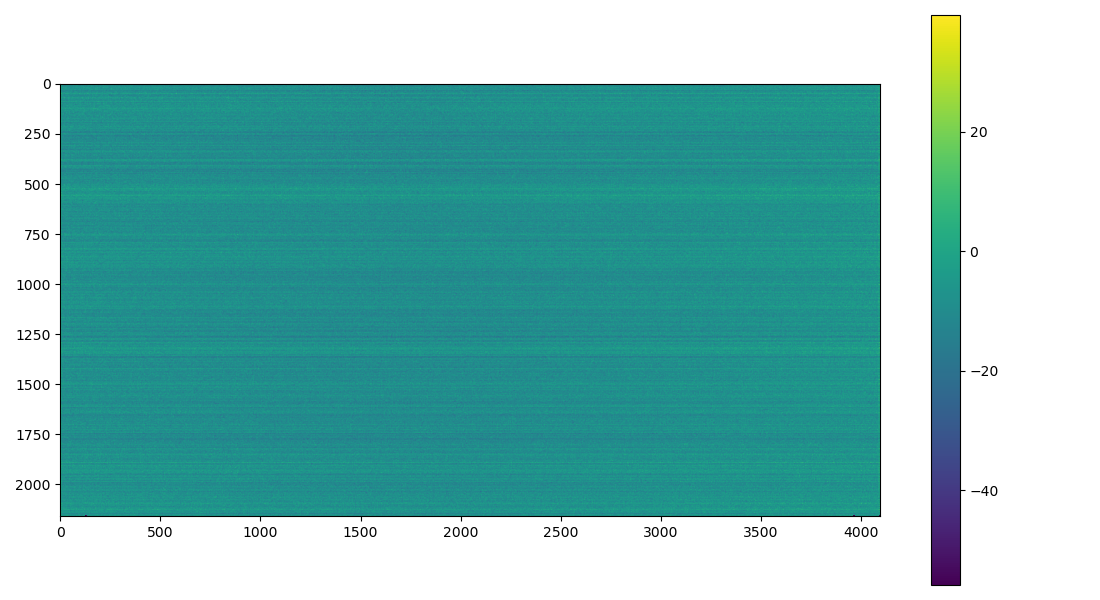

In [7]:
frame_fig(darkframes[410] - mean_darkframes)

<IPython.core.display.Javascript object>


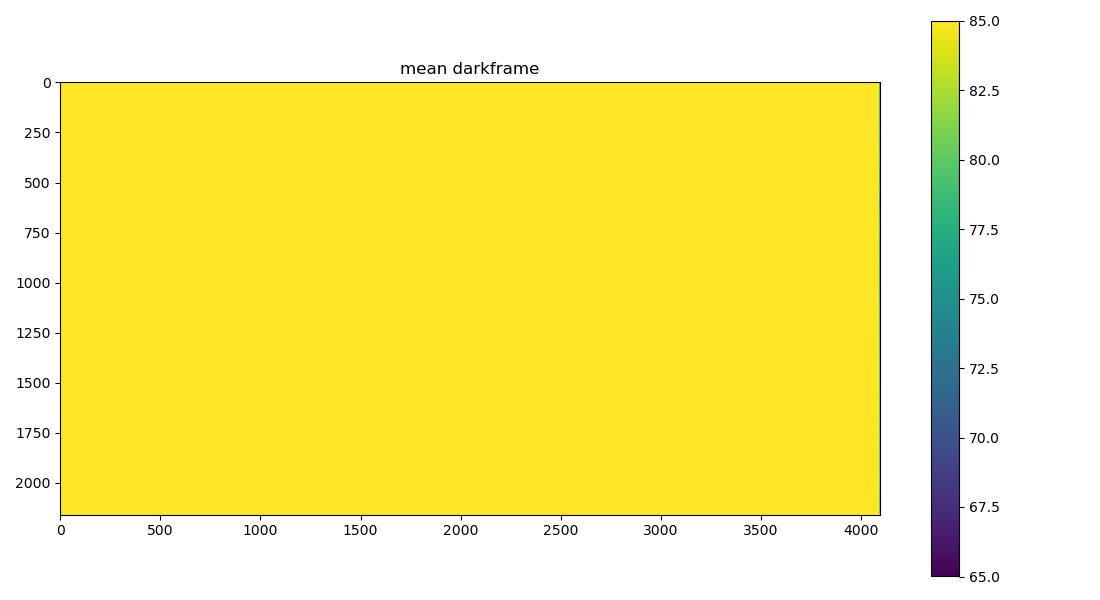

<IPython.core.display.Javascript object>


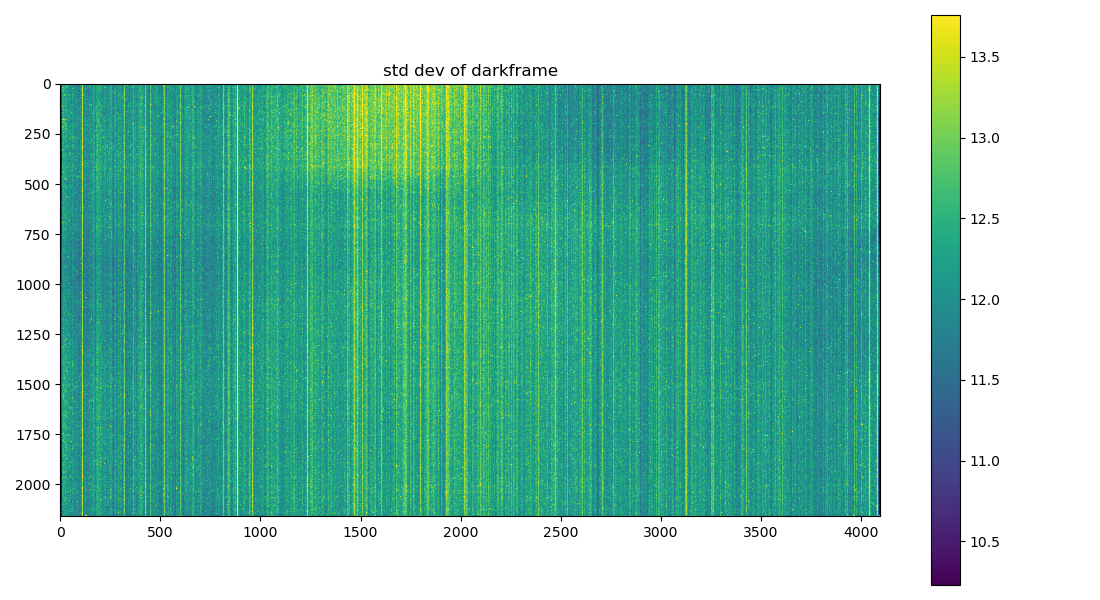

In [23]:
frame_fig(mean_darkframes, auto_range=True, title="mean darkframe", vmin=65, vmax=85)
frame_fig(std_darkframes, nσ=1.5, title="std dev of darkframe")

<IPython.core.display.Javascript object>


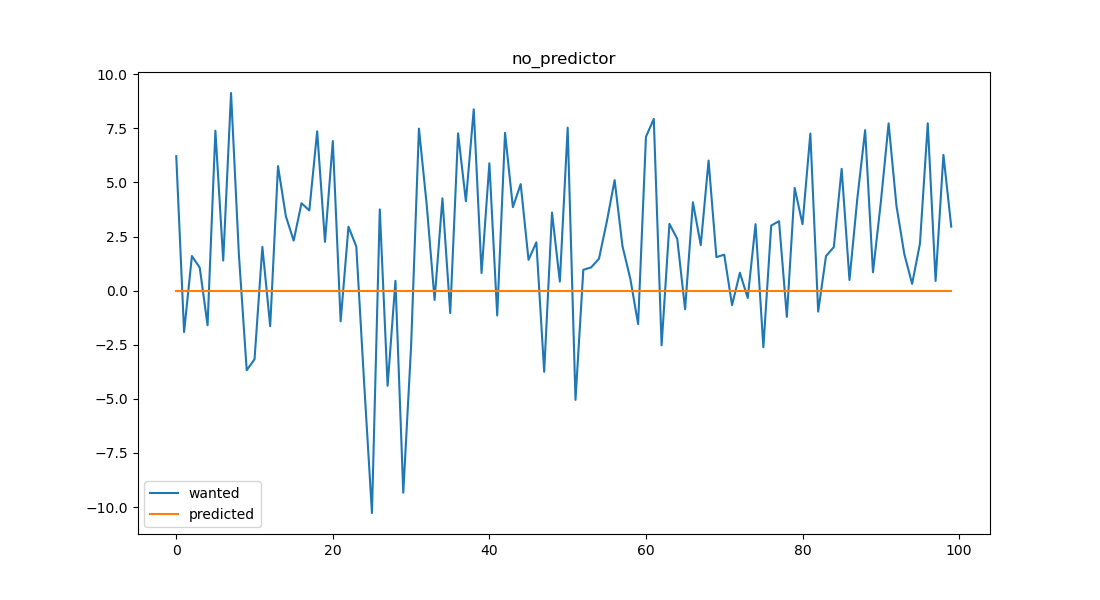

4.522024391643625


<IPython.core.display.Javascript object>


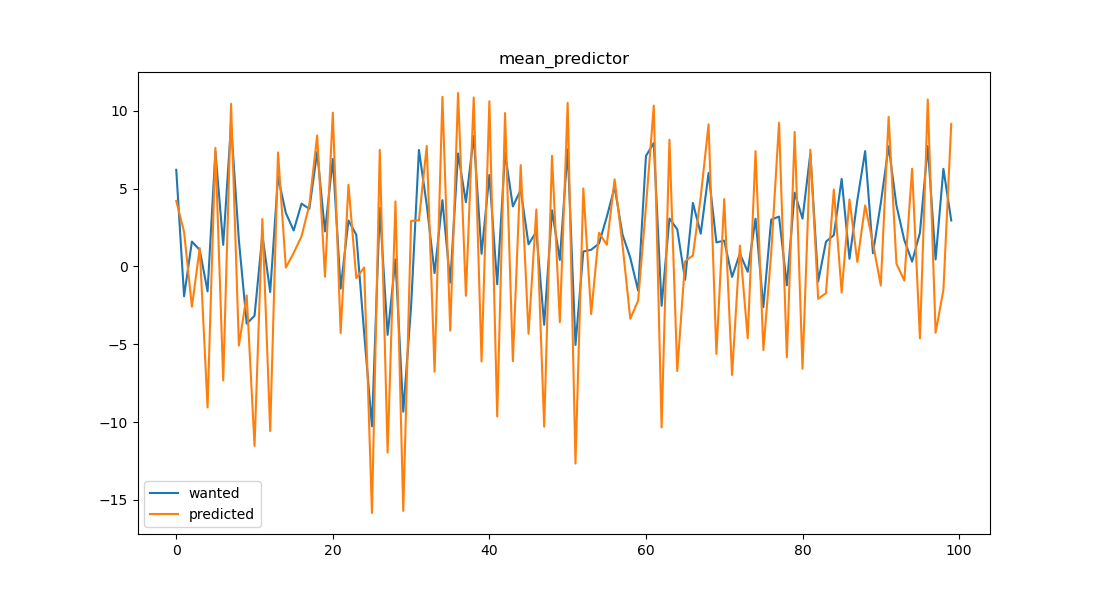

5.553560710309927


In [9]:
def metric(predicted, goal):
    δ = goal - predicted
    return np.sqrt(np.sum(δ*δ) / len(predicted))

def mean_predictor(black_cols):
    return np.mean(black_cols, axis=1)

def no_predictor(black_cols):
    return np.zeros_like(black_cols[:,0])

black_cols = []
row_means = []
col_means = []
green_diffs = []
num_lags = 2

def lags_for_num_lags(num_lag):
    return list(range(-num_lag, 0)) + list(range(1, num_lag + 1))

should_correct_offset = False
def correct_offset(corr):
    if should_correct_offset:
        off = 0.50 * (np.mean(corr[2:-2,:8]) + np.mean(corr[2:-2,-8:]))
        return corr - off
    else:
        return corr


for darkframe in darkframes:
    corr = (darkframe - mean_darkframes)[2:-2]
    corr = correct_offset(corr)
    darkframe_a = corr[::2]
    darkframe_b = corr[1::2]
    black_cols.append(
        np.hstack([
            darkframe_a[:,:8],darkframe_a[:,-8:], darkframe_b[:,:8],darkframe_b[:,-8:]])) 
    
    green_diff = []
    for lag in lags_for_num_lags(num_lags):
        green_diff.append(
            np.median(
                corr[::2,::2] - np.roll(corr, lag, axis=0)[::2,abs(lag) % 2::2],
                axis=1,
            )
        )
                
    green_diffs.append(np.vstack(green_diff))
    
    c_mean = np.hstack([np.mean(corr[:,:8], axis=0), np.mean(corr[:,-8:], axis=0)])
    col_means.append(np.vstack([c_mean] * black_cols[-1].shape[0]))
    row_means.append(np.mean(darkframe_a[:,8:-8], axis=1))
    
black_cols = np.vstack(black_cols)
row_means = np.hstack(row_means)
col_means = np.vstack(col_means)
green_diffs = np.hstack(green_diffs).T
    
def get_data_for_nrows(nrows=1, with_green_diff=False, with_col_means=False):
    b = []
    for i in range(-nrows + 1, nrows):
        b.append(np.roll(black_cols, i, axis=0))
        
    if with_green_diff:
        b.append(green_diffs)
    
    if with_col_means:
        b.append(col_means)
    b = np.hstack(b)
    return b, row_means

def get_data_for_frame(frame, **kwargs):
    b, _ = get_data_for_nrows(**kwargs)
    per_frame = b.shape[0] // len(darkframes)
    return b[frame * per_frame : (frame + 1) * per_frame,:]
    
def calculate_correction(predictor, **kwargs):
    b, r = get_data_for_nrows(**kwargs)
    predicted = predictor(b)
    return b, r, predicted

def evaluate_predictor(predictor, **kwargs):
    _, r, predicted = calculate_correction(predictor, **kwargs)
    plt.figure(figsize=s)
    plt.plot(r[0:100], label="wanted")
    plt.plot(predicted[0:100], label="predicted")
    plt.title(predictor.__name__)
    plt.legend()
    return metric(predicted, r)

print(evaluate_predictor(no_predictor))
print(evaluate_predictor(mean_predictor))

[0.11016324 0.24984312]


<IPython.core.display.Javascript object>


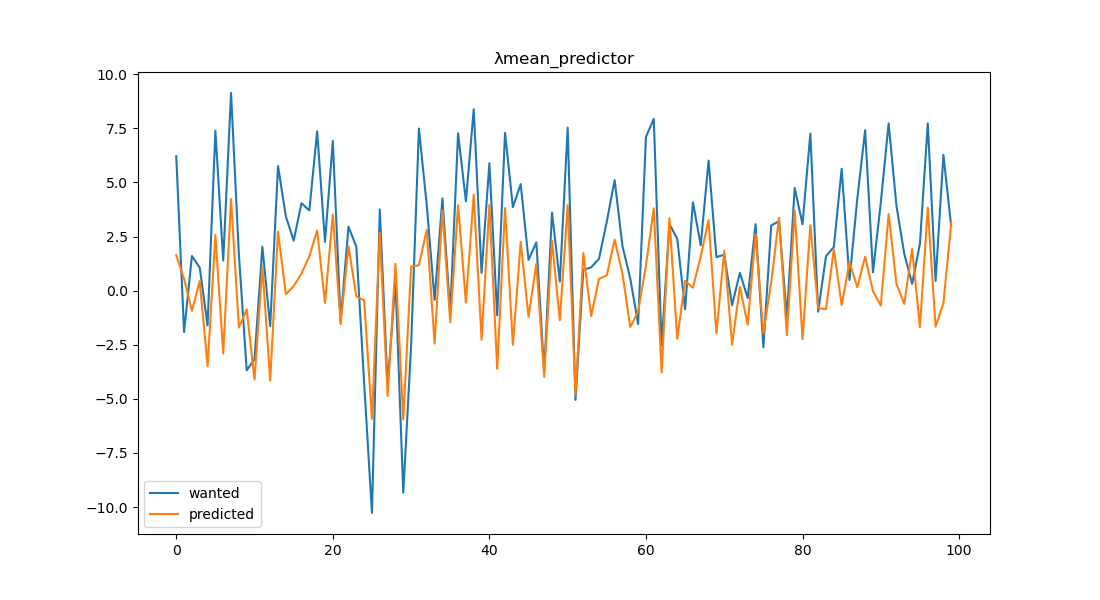

3.901010227142937


In [10]:
k = black_cols[0].shape[0]
def λmean_predictor(black_cols, *args):
    λ = args[0]
    b = args[1]
    k1 = np.mean(black_cols[:,:16], axis=1)
    k2 = np.mean(black_cols[:,16:], axis=1)
    return λ * k1 + b * k2
    #return λ * np.mean(black_cols, axis=1) + b

from scipy.optimize import curve_fit

popt, _ = curve_fit(λmean_predictor, black_cols, row_means, p0=[1.0, 0.0])

trained_λmean_predictor = lambda black_cols, popt=popt: λmean_predictor(black_cols, *popt)
trained_λmean_predictor.__name__ = "λmean_predictor"
print(popt)
print(evaluate_predictor(trained_λmean_predictor))

-0.00047620149985732767


<IPython.core.display.Javascript object>


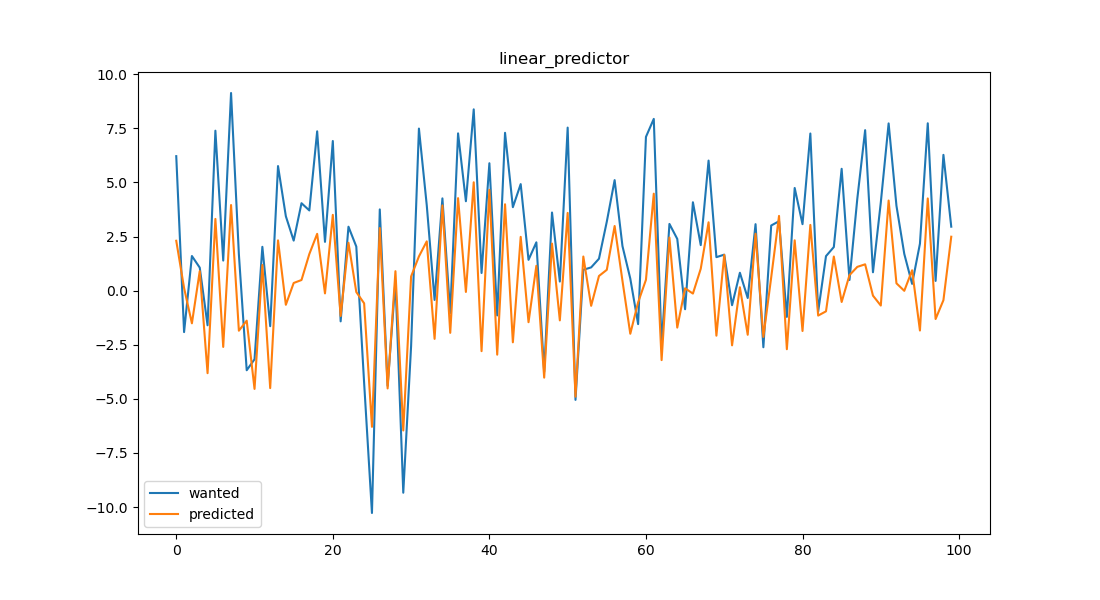

3.8733124790026414


<IPython.core.display.Javascript object>


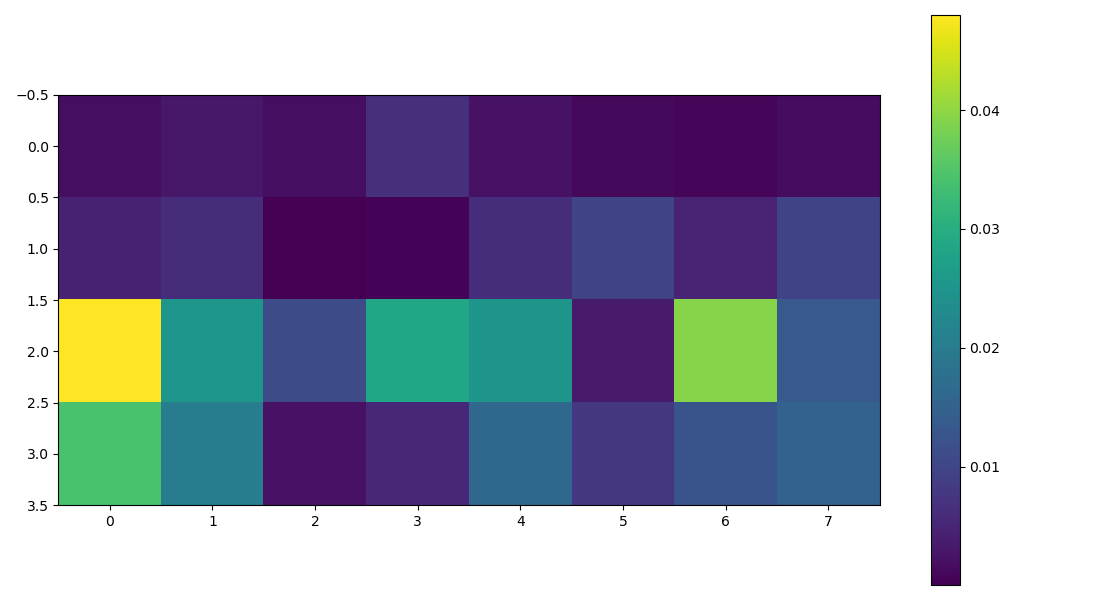

In [11]:
k = black_cols[0].shape[0]
def linear_predictor(black_cols, *args):
    A = np.array(args[:k])
    b = args[-1]
    return np.matmul(A, black_cols.T) + b

from scipy.optimize import curve_fit

popt, _ = curve_fit(linear_predictor, black_cols, row_means, p0=[0.1] * k + [0.0], )

print(popt[-1])
trained_linear_predictor = lambda black_cols, popt=popt: linear_predictor(black_cols, *popt)
trained_linear_predictor.__name__ = "linear_predictor"
print(evaluate_predictor(trained_linear_predictor))
frame_fig(popt[:-1].reshape((-1, 8)), auto_range=True)

[0.00210455]


<IPython.core.display.Javascript object>


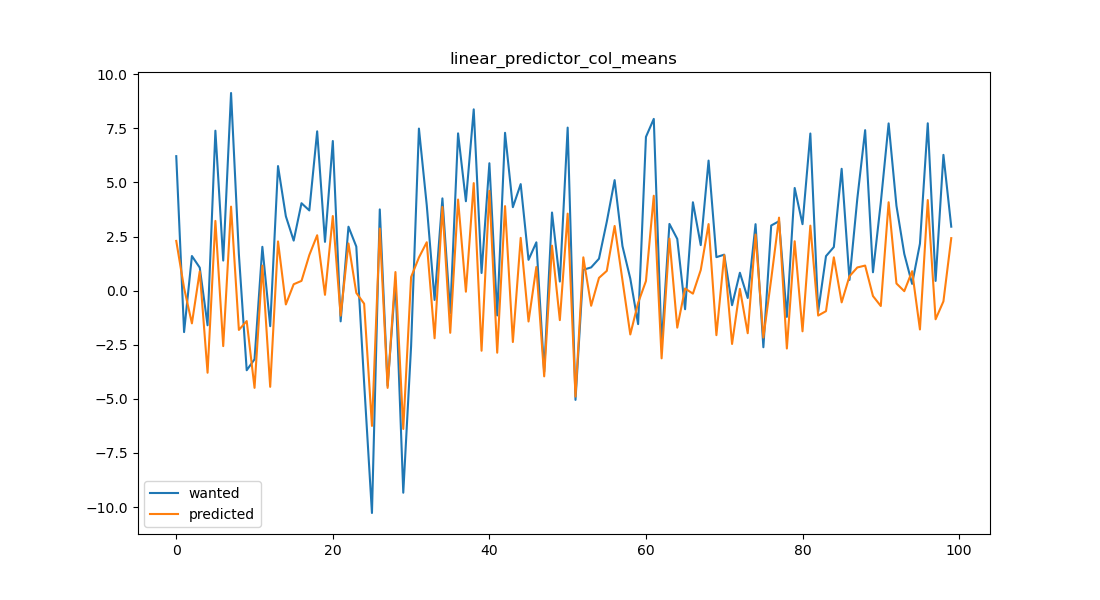

3.764477351889855


<IPython.core.display.Javascript object>


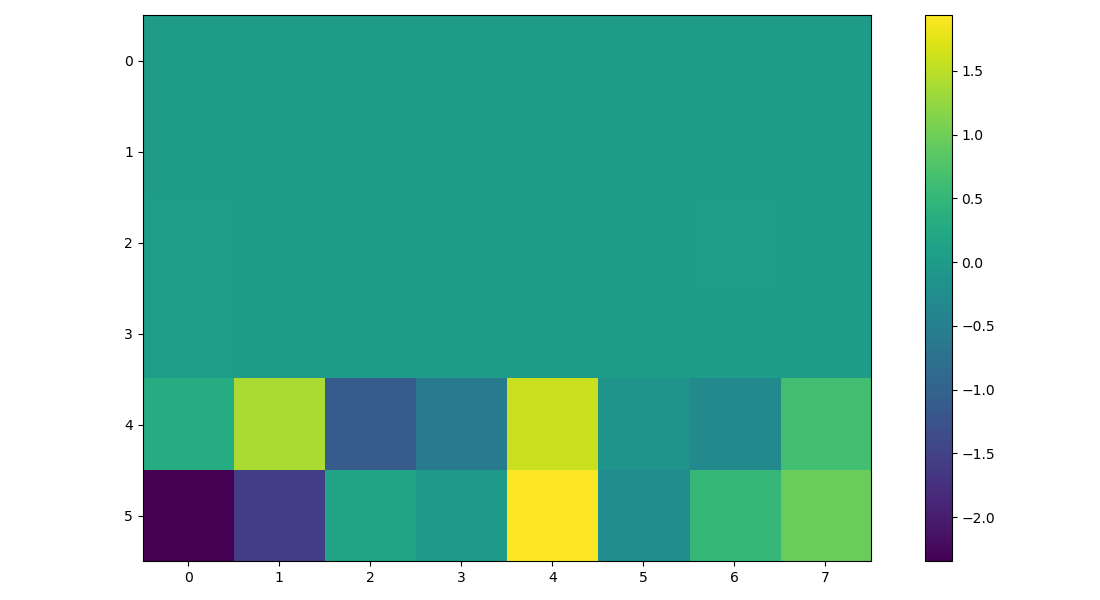

In [12]:
def linear_predictor_col_means(black_cols, *args):
    A = np.array(args[:-1])
    b = args[-1]
    v = np.matmul(A, black_cols.T)
    return v + b

from scipy.optimize import curve_fit

b, r = get_data_for_nrows(nrows=1, with_col_means=True)
popt, _ = curve_fit(linear_predictor_col_means, b, r, p0=[0.0] * b.shape[-1] + [0.0])
print(popt[-1:])
trained_linear_predictor_col_means = lambda black_cols, popt=popt: linear_predictor_col_means(black_cols, *popt)
trained_linear_predictor_col_means.__name__ = "linear_predictor_col_means"
trained_linear_predictor_col_means.with_col_means = True
print(evaluate_predictor(trained_linear_predictor_col_means, with_col_means=True))
frame_fig(popt[:-1].reshape((-1, 8)), auto_range=True)

[0.00140573]


<IPython.core.display.Javascript object>


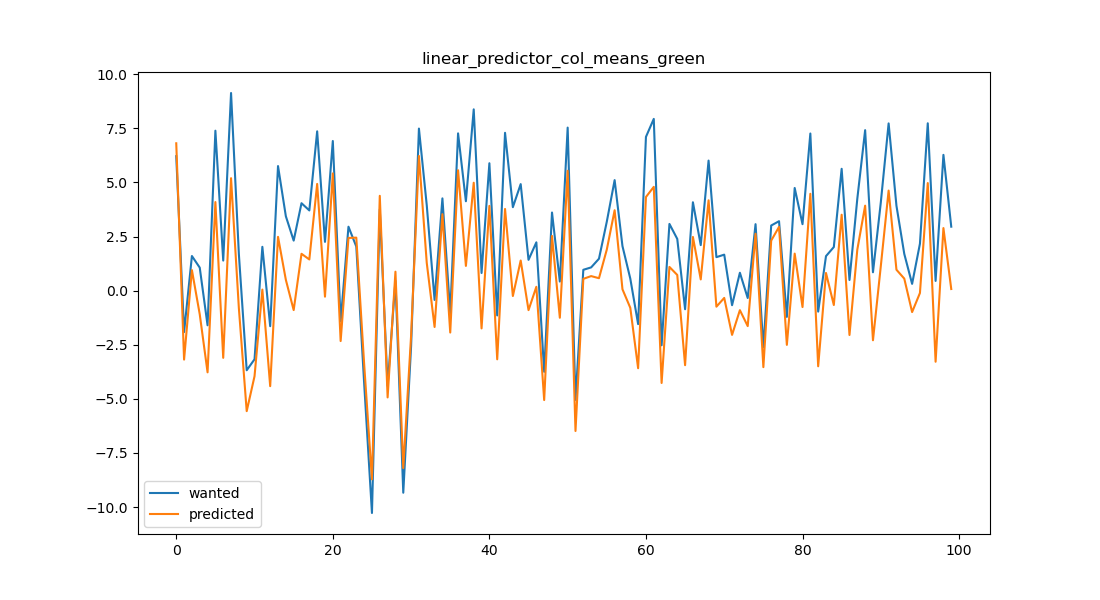

3.2571986878611385


In [13]:
def linear_predictor_col_means_green(black_cols, *args):
    A = np.array(args[:-1])
    b = args[-1]
    v = np.matmul(A, black_cols.T)
    return v + b

from scipy.optimize import curve_fit

nrows = 2
p = {"with_green_diff": True, "with_col_means": True}
b, r = get_data_for_nrows(nrows=nrows, **p)
popt, _ = curve_fit(linear_predictor_col_means_green, b, r, p0=[1.0] * b.shape[-1] + [0.0])
print(popt[-1:])
trained_linear_predictor_col_means_green = lambda black_cols, popt=popt: linear_predictor_col_means_green(black_cols, *popt)
trained_linear_predictor_col_means_green.__name__ = "linear_predictor_col_means_green"
trained_linear_predictor_col_means_green.nrows = nrows
for name, v in p.items():
    setattr(trained_linear_predictor_col_means_green, name, v)
print(evaluate_predictor(trained_linear_predictor_col_means_green, nrows=nrows, **p))
# frame_fig(popt[:-1].reshape((-1, 33)), auto_range=True)

[ 0.06668533  0.10087063  0.08358946  0.15003895  0.04219148  0.10793249
  0.3019705   0.07878563  0.06970105  0.24191091  1.06616232 -0.01390442]


<IPython.core.display.Javascript object>


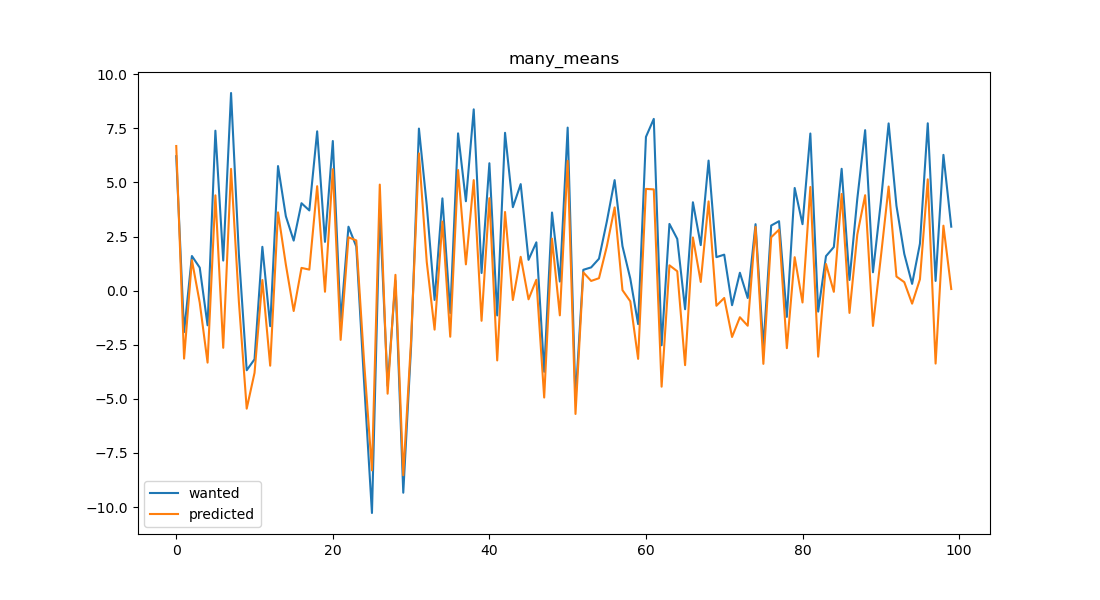

3.3442177909213764


In [14]:
def many_means(black_cols, *args):
    r = 32 
    n = black_cols.shape[-1] // r
    
    j = 0
    v = np.zeros_like(black_cols[:,0])
    # for i in range(n):
    for i in range(n):
        v += args[j] * np.median(black_cols[:,i * r: i * r + 16], axis=1)
        j += 1

        v += args[j] * np.median(black_cols[:,i * r + 16: i * r + 32], axis=1)
        j += 1
        
    for lag in range(2 * num_lags):
        v += args[j] * black_cols[:,-16 - 2 * num_lags + lag]
        j += 1
        
    v += args[j] * np.mean(black_cols[:,-16:], axis=1)
    j += 1
    v += args[j]
    return v

from scipy.optimize import curve_fit

nrows = 2
b, r = get_data_for_nrows(nrows=nrows, with_green_diff=True, with_col_means=True)

popt, _ = curve_fit(many_means, b, r, p0=[1.0, 1.0] * (2 * nrows - 1) + [1.0] * 4 + [1.0, 0.0])

print(popt)
trained_many_means = lambda black_cols, popt=popt: many_means(black_cols, *popt)
trained_many_means.__name__ = "many_means"
trained_many_means.nrows = nrows
trained_many_means.with_col_means = True
trained_many_means.with_green_diff = True
print(evaluate_predictor(trained_many_means, nrows=nrows, with_col_means=True, with_green_diff=True))

<IPython.core.display.Javascript object>


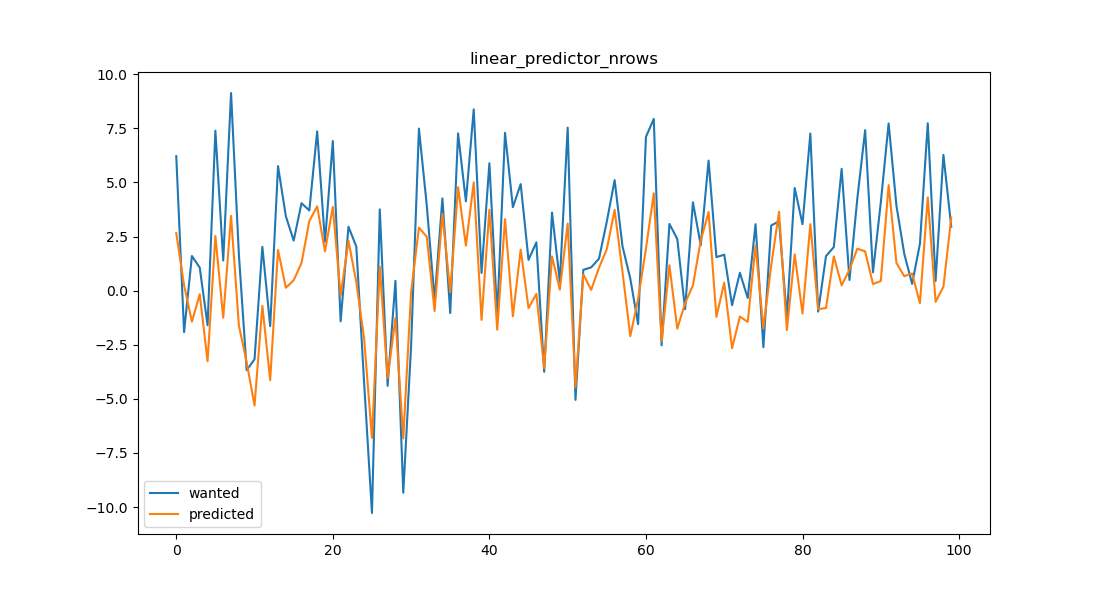

3.774773373079469


<IPython.core.display.Javascript object>


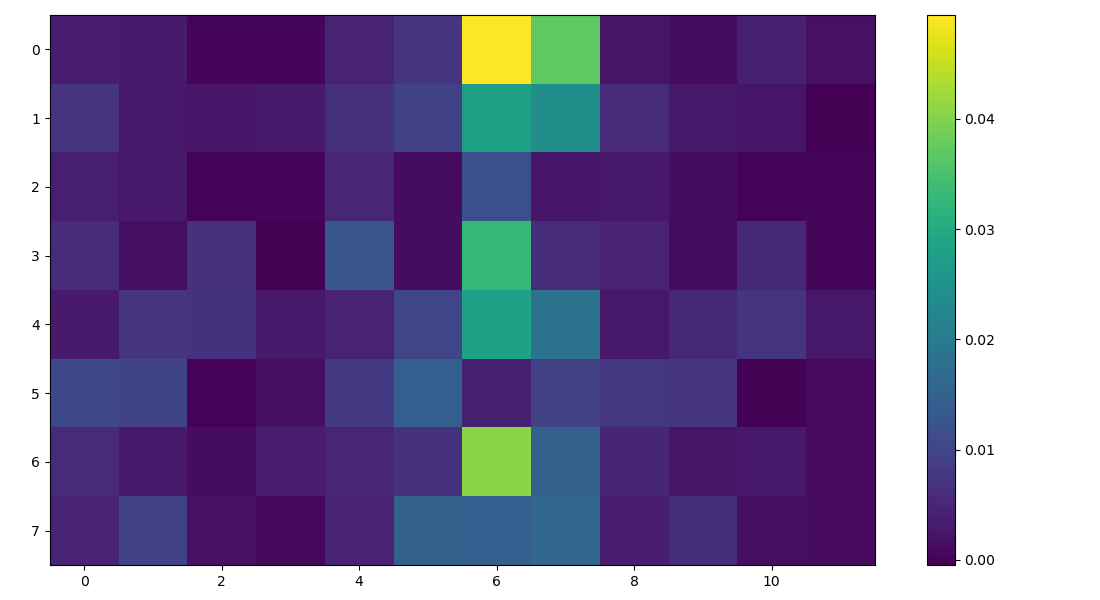

In [15]:
nrows = 2
tt = 2 * nrows - 1
k = black_cols[0].shape[0]

def linear_predictor_nrows(black_cols, *args):
    A = np.array(args[:k * tt])
    b = args[-1]
    return np.matmul(A, black_cols.T) + b

from scipy.optimize import curve_fit

b, r = get_data_for_nrows(nrows)
popt, _ = curve_fit(linear_predictor_nrows, b, r, p0=[0.0] * k * tt + [0.0])

trained_linear_predictor_nrows = lambda black_cols, popt=popt: linear_predictor_nrows(b, *popt)
trained_linear_predictor_nrows.__name__ = "linear_predictor_nrows"
trained_linear_predictor_nrows.nrows = nrows
print(evaluate_predictor(trained_linear_predictor_nrows, nrows=nrows))
frame_fig(popt[:-1].reshape((-1, 8)).T, auto_range=True)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X, y = get_data_for_nrows(nrows=2, with_col_means=True, with_green_diff=True)

# b, _ = get_data_for_nrows(**params_for_predictor(trained_many_means))
# y = y - trained_many_means(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)


# pca = PCA()
# pca.fit(X_train)
# plt.figure(figsize=s)
# plt.plot(pca.explained_variance_ratio_)
pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
#        ('pac', PCA(n_components=40)),
        ('mlp', MLPRegressor(
            hidden_layer_sizes=(80,80,80,80),
            max_iter=20, 
            solver="adam", 
            batch_size=100,
#            alpha=0.1,
            verbose=True
        )),
    ]
)
pipe.fit(X_train, y_train)

Iteration 1, loss = 5.43764081
Iteration 2, loss = 4.84574973
Iteration 3, loss = 3.14843314
Iteration 4, loss = 1.16304337
Iteration 5, loss = 0.90390176
Iteration 6, loss = 0.86012499
Iteration 7, loss = 0.83412986
Iteration 8, loss = 0.81795476
Iteration 9, loss = 0.80585075
Iteration 10, loss = 0.79436156
Iteration 11, loss = 0.78638154
Iteration 12, loss = 0.77755374
Iteration 13, loss = 0.77113366
Iteration 14, loss = 0.76273336
Iteration 15, loss = 0.75455181
Iteration 16, loss = 0.74721443
Iteration 17, loss = 0.74315203
Iteration 18, loss = 0.73615248
Iteration 19, loss = 0.73320517
Iteration 20, loss = 0.72757682


/home/robin/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPRegressor(batch_size=100,
                              hidden_layer_sizes=(80, 80, 80, 80), max_iter=20,
                              verbose=True))])

<IPython.core.display.Javascript object>


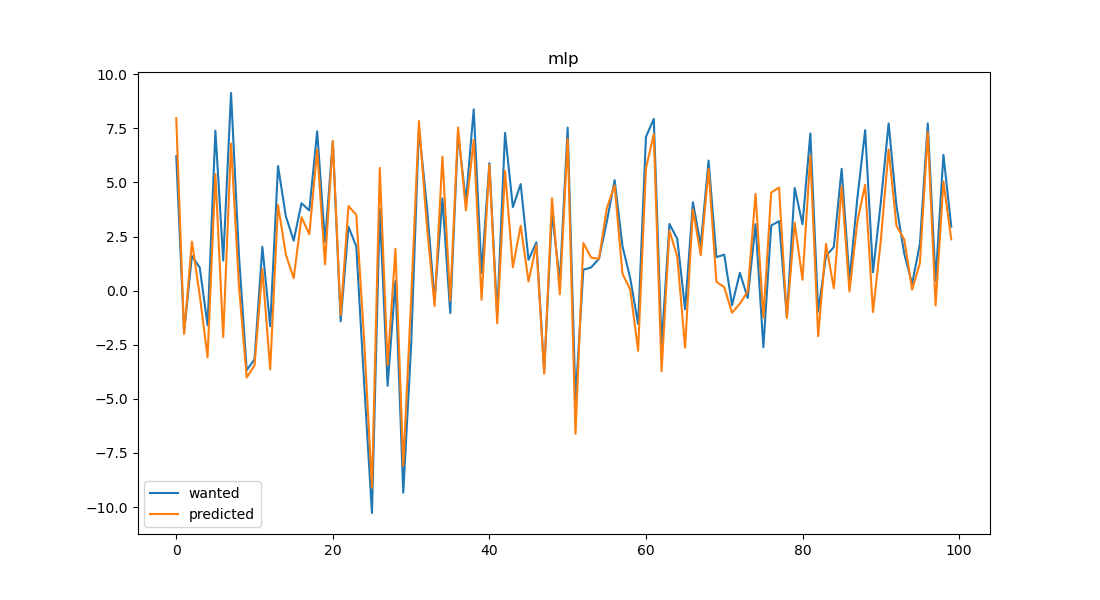

1.2163968918513002


In [24]:
def trained_pipe(x):
    return pipe.predict(x)
    # for_pipe = np.hstack([x[:,:-20], x[:,-16:]])
    # p = pipe.predict(for_pipe)
    # p = np.repeat(np.mean(p.reshape(-1, 1078), axis=1), 1078)
    # return p + trained_many_means(x)
    
trained_pipe.__name__ = "mlp"
trained_pipe.nrows = 2
trained_pipe.with_col_means = True
trained_pipe.with_green_diff = True

print(evaluate_predictor(trained_pipe, nrows=2, with_col_means=True, with_green_diff=True))

In [25]:
def params_for_predictor(predictor):
    nrows = 1
    with_col_means = False
    with_green_diff = False
    if hasattr(predictor, "nrows"):
        nrows = predictor.nrows
    if hasattr(predictor, "with_col_means"):
        with_col_means = predictor.with_col_means
    if hasattr(predictor, "with_green_diff"):
        with_green_diff = predictor.with_green_diff
    
    return {"nrows": nrows, "with_col_means": with_col_means, "with_green_diff": with_green_diff}


def get_data_for_frame(frame, **kwargs):
    b, _ = get_data_for_nrows(**kwargs)
    per_frame = b.shape[0] // len(darkframes)
    return b[frame * per_frame : (frame + 1) * per_frame,:]
    

def correct_frame(i, predictor):
    p = params_for_predictor(predictor)
    b = get_data_for_frame(i, **p)
    frame = darkframes[i] - mean_darkframes
    frame = correct_offset(frame)
    frame = frame[::2][1:-1]
    row_means = predictor(b)
    corr = (frame[:len(row_means),8:-8].T - row_means).T
    return corr, frame


<IPython.core.display.Javascript object>


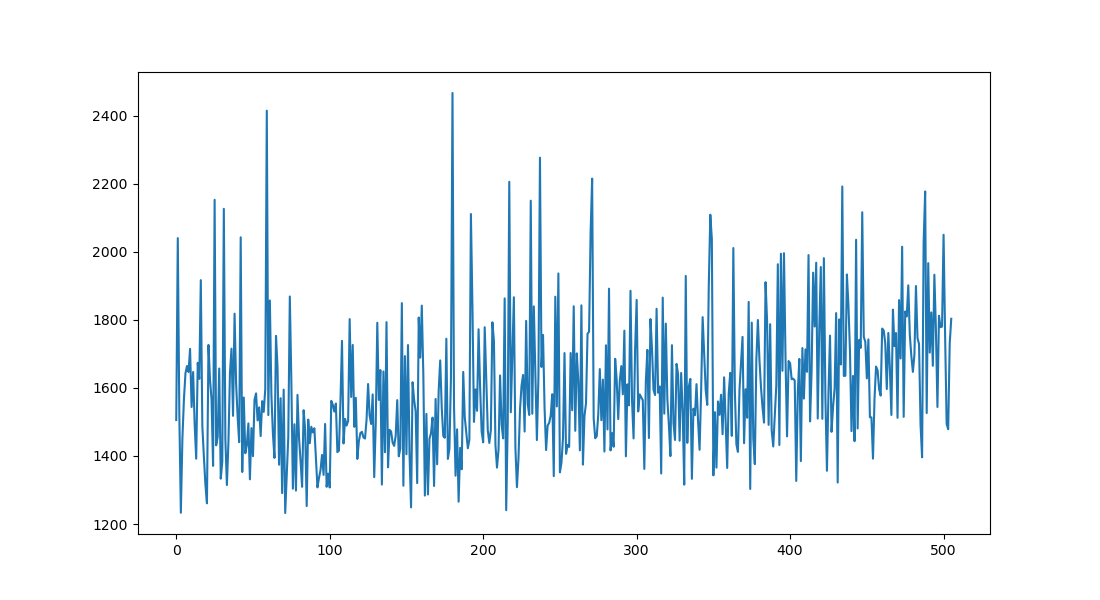

<IPython.core.display.Javascript object>


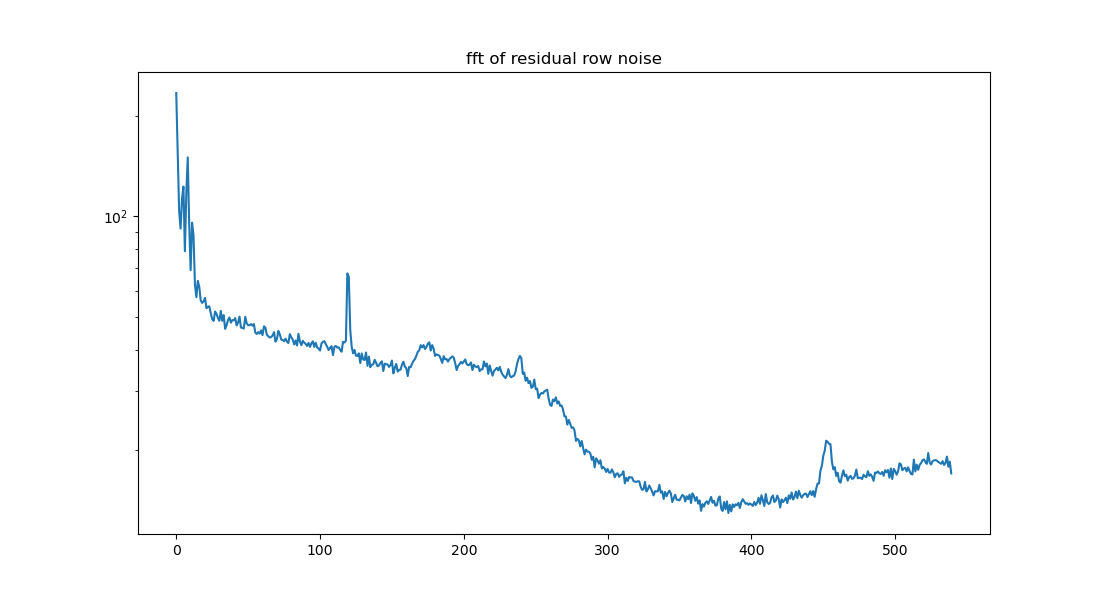

<IPython.core.display.Javascript object>


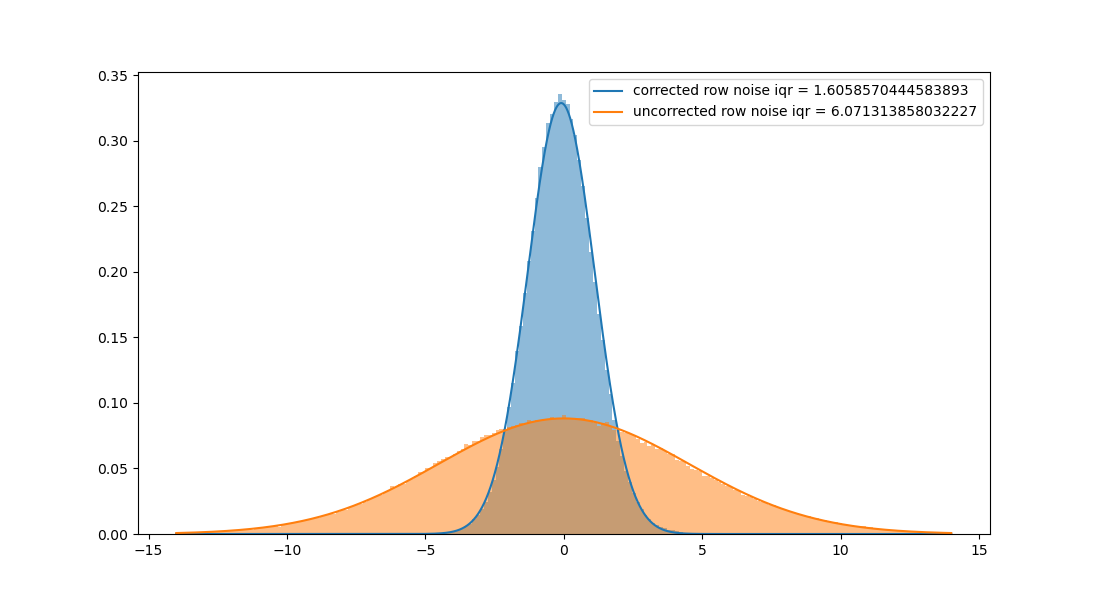

<ipython-input-37-a3e5d3de7dff>:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=s)


<IPython.core.display.Javascript object>


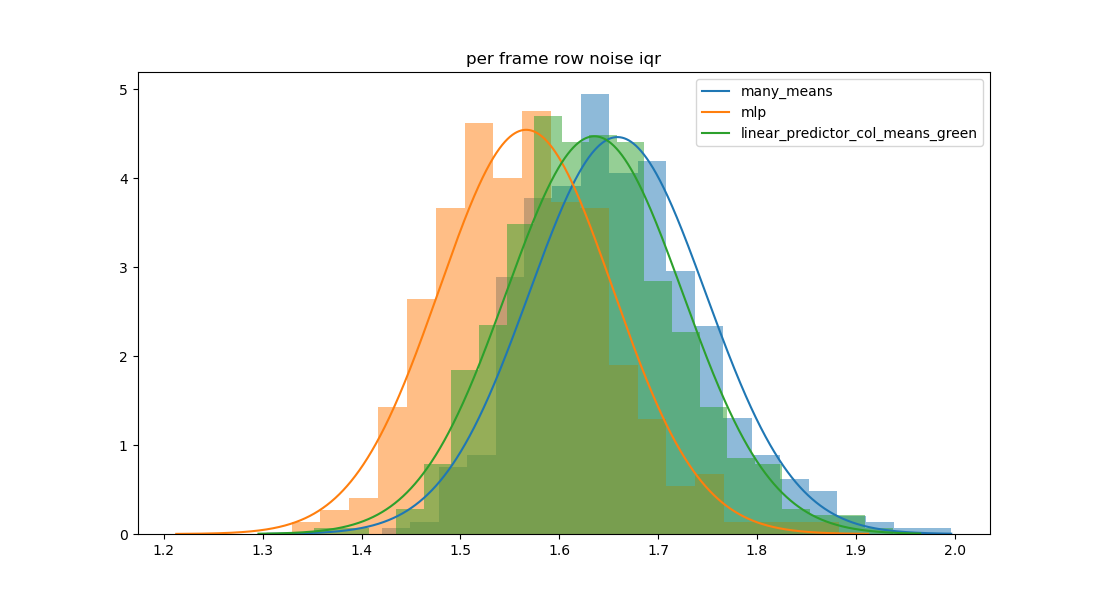

In [37]:
pred = trained_many_means
pred = trained_linear_predictor_col_means_green
pred = trained_pipe
# pred = tf_predictor
p = params_for_predictor(pred)
b, r = get_data_for_nrows(**p)
predicted = pred(b)
# δ = (r - predicted)**2
δ = r - predicted

frame_sum = np.sum((δ**2).reshape(len(darkframes), -1), axis=1)
plt.figure(figsize=s)
plt.plot(frame_sum)
# 
# frame_sum = np.sum(δ.reshape(len(darkframes), -1), axis=0)
# plt.figure(figsize=s)
# plt.plot(frame_sum)

δ_per_frame = δ.reshape(len(darkframes), -1)
# print(δ_per_frame.shape)
# print(np.mean(np.apply_along_axis(np.fft.rfft, 1, δ_per_frame), axis=1).shape)
δ_fft_avg = np.mean(np.abs(np.apply_along_axis(np.fft.rfft, 1, δ_per_frame)), axis=0)
plt.figure(figsize=s)
plt.plot(δ_fft_avg)
plt.yscale("log")
plt.title("fft of residual row noise")

from scipy.stats import norm

def p(d, l):
    x = np.linspace(-14, 14, 200)
    xx = np.linspace(np.min(x), np.max(x), 100 * len(x))
    l = plt.plot(xx, norm.pdf(xx, np.mean(d), np.std(d)), label=l + f" iqr = {iqr(d)}")
    plt.hist(d, alpha=0.5, bins=x, density=True, color=l[0].get_color())
    
plt.figure(figsize=s)
p(δ, "corrected row noise")
p(r, "uncorrected row noise")
plt.legend()

def p_iqr(pred):
    p = params_for_predictor(pred)
    b, r = get_data_for_nrows(**p)
    predicted = pred(b)
    δ = r - predicted
    per_frame_iqr = iqr(δ.reshape(len(darkframes), -1), axis=1)
    σ = iqr(per_frame_iqr)
    μ = np.median(per_frame_iqr)
    x = np.linspace(μ - 3*σ, μ + 3*σ, 25)
    xx = np.linspace(np.min(x), np.max(x), 100 * len(x))
    l = plt.plot(xx, norm.pdf(xx, np.mean(per_frame_iqr), np.std(per_frame_iqr)), label=pred.__name__)
    plt.hist(per_frame_iqr, alpha=0.5, bins=x, density=True, color=l[0].get_color())

plt.figure(figsize=s)
p_iqr(trained_many_means)
p_iqr(trained_pipe)
p_iqr(trained_linear_predictor_col_means_green)
# p_iqr(tf_predictor)
plt.title("per frame row noise iqr")
plt.legend()

1/1 [==============================] - 0s 24ms/step


<IPython.core.display.Javascript object>


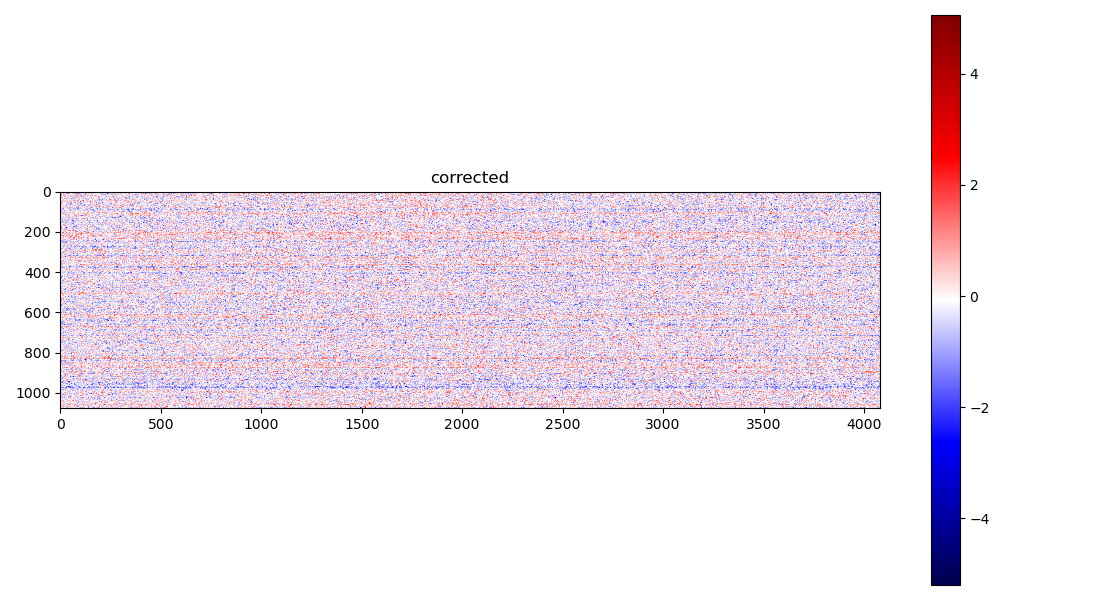

<IPython.core.display.Javascript object>


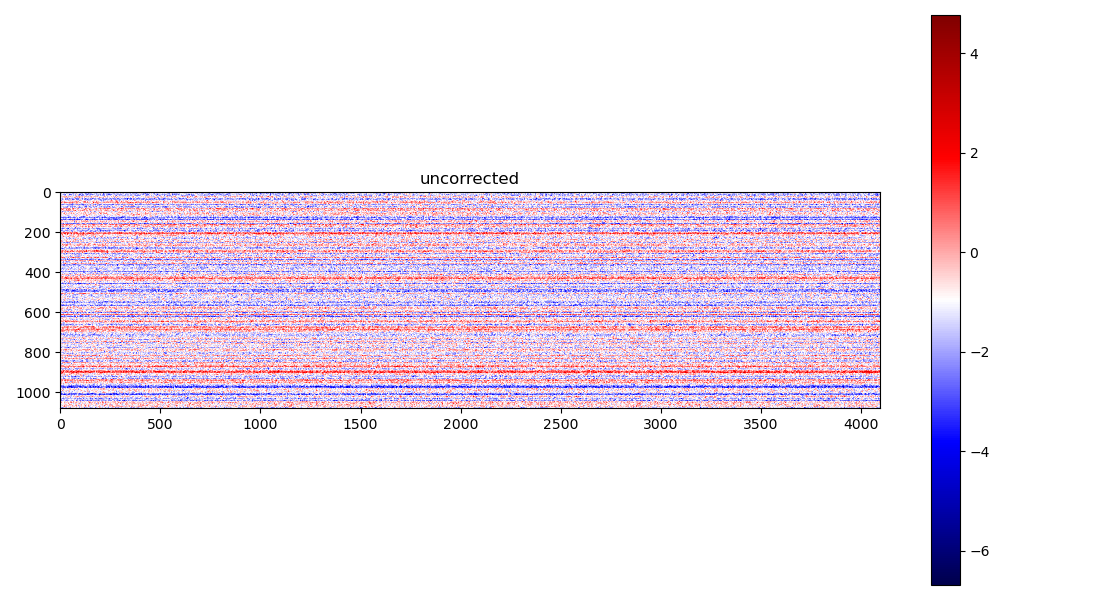

Text(0.5, 1.0, 'uncorrected')

In [124]:
frame = 470
corr, uncorr = correct_frame(frame, pred)
frame_fig(corr, cmap="seismic", nσ=1)
plt.title("corrected")
frame_fig(uncorr, cmap="seismic", nσ=1)
plt.title("uncorrected")

<IPython.core.display.Javascript object>


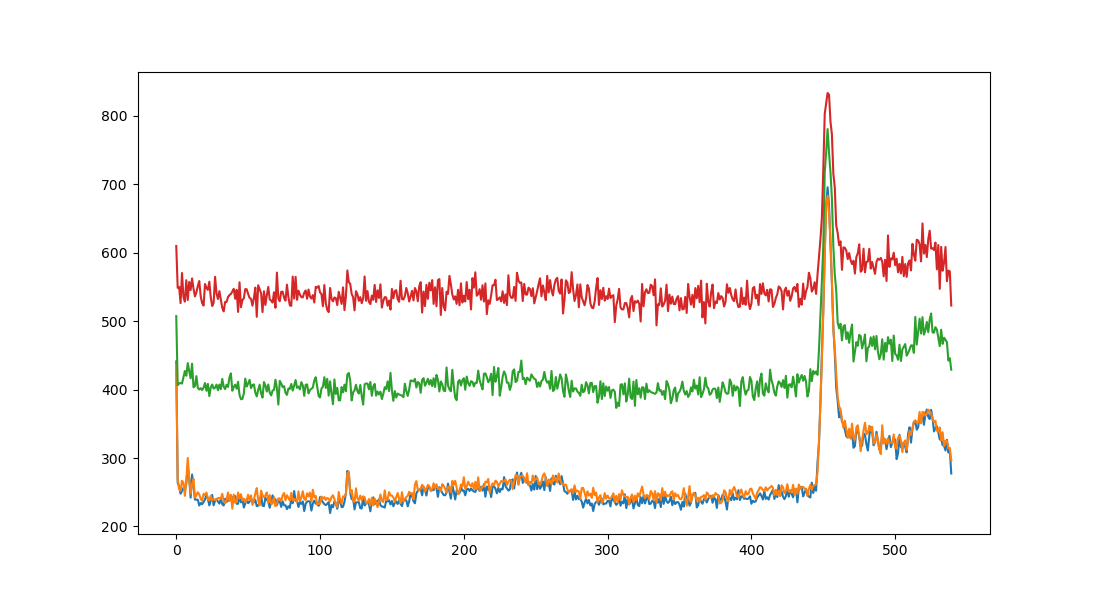

<ipython-input-35-17e69f6b15c2>:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=s)


<IPython.core.display.Javascript object>


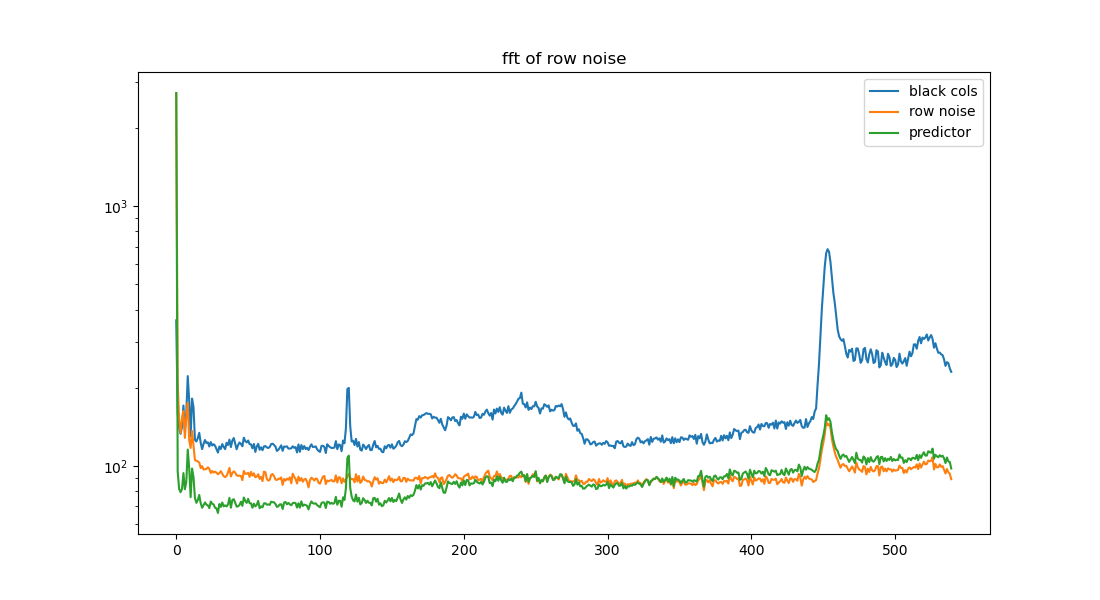

Text(0.5, 1.0, 'fft of row noise')

In [35]:
b, r = get_data_for_nrows(1)


bb = b.reshape(len(darkframes), -1, b.shape[-1])
bb_fft = np.mean(np.abs(np.apply_along_axis(np.fft.rfft, 1, bb)), axis=0)

plt.figure(figsize=s)
for i in bb_fft.T[8:12]:
    plt.plot(i)
    # plt.yscale("log")


b_avg = np.mean(b, axis=1).reshape(len(darkframes), -1)
r = r.reshape(b_avg.shape)
b_fft_avg = np.mean(np.abs(np.apply_along_axis(np.fft.rfft, 1, b_avg)), axis=0)
r_fft_avg = np.mean(np.abs(np.apply_along_axis(np.fft.rfft, 1, r)), axis=0)

p = params_for_predictor(pred)
b_p, _ = get_data_for_nrows(**p)
predicted = pred(b_p)
predicted = predicted.reshape(b_avg.shape)
predicted_fft_avg = np.mean(np.abs(np.apply_along_axis(np.fft.rfft, 1, predicted)), axis=0)



plt.figure(figsize=s)
plt.plot(b_fft_avg, label="black cols")
plt.plot(r_fft_avg, label="row noise")
plt.plot(predicted_fft_avg, label="predictor")
plt.legend()
plt.yscale("log")
plt.title("fft of row noise")

In [169]:
frame_col_means = np.vstack(
    [
        np.mean(correct_frame(frame, pred)[1], axis=0) for frame in range(len(darkframes[:20]))
    ]
)

1/1 [==============================] - 0s 22ms/step


<IPython.core.display.Javascript object>


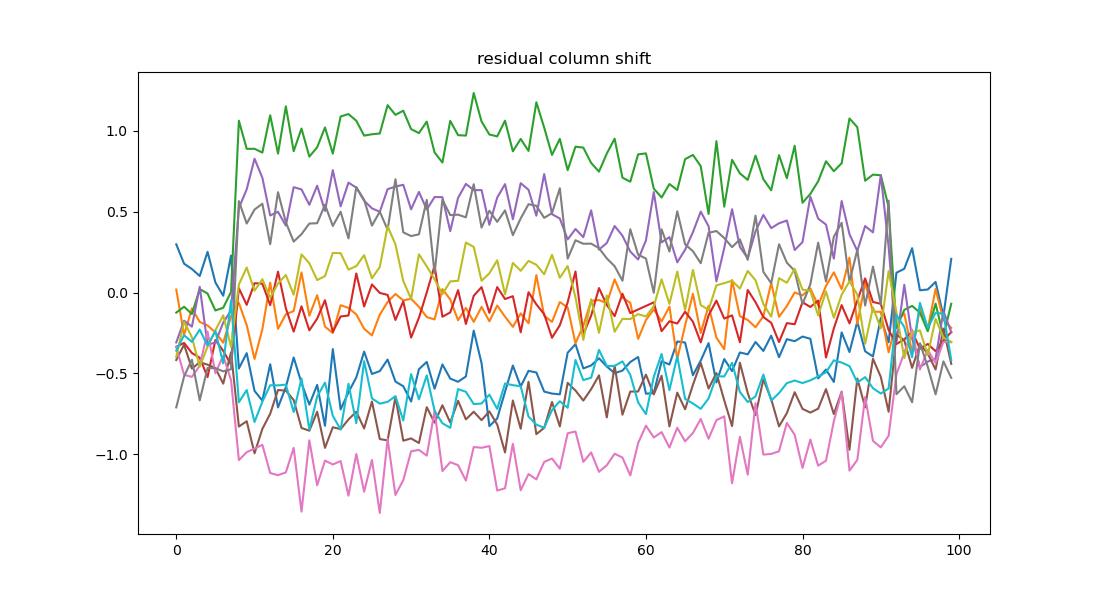

Text(0.5, 1.0, 'residual column shift')

In [170]:
# frame_col_means = np.vstack([
#     np.mean(darkframe - mean_darkframes, axis=0) for darkframe in darkframes
# ])
plt.figure(figsize=s)
for i in range(10):
    d = frame_col_means[i]
    plt.plot(np.hstack([d[:50], d[-50:]]), label=f"i = {i}")# , alpha=0.1, color="black")
    # plt.plot(d)
    
plt.title("residual column shift")
# plt.legend()

<IPython.core.display.Javascript object>


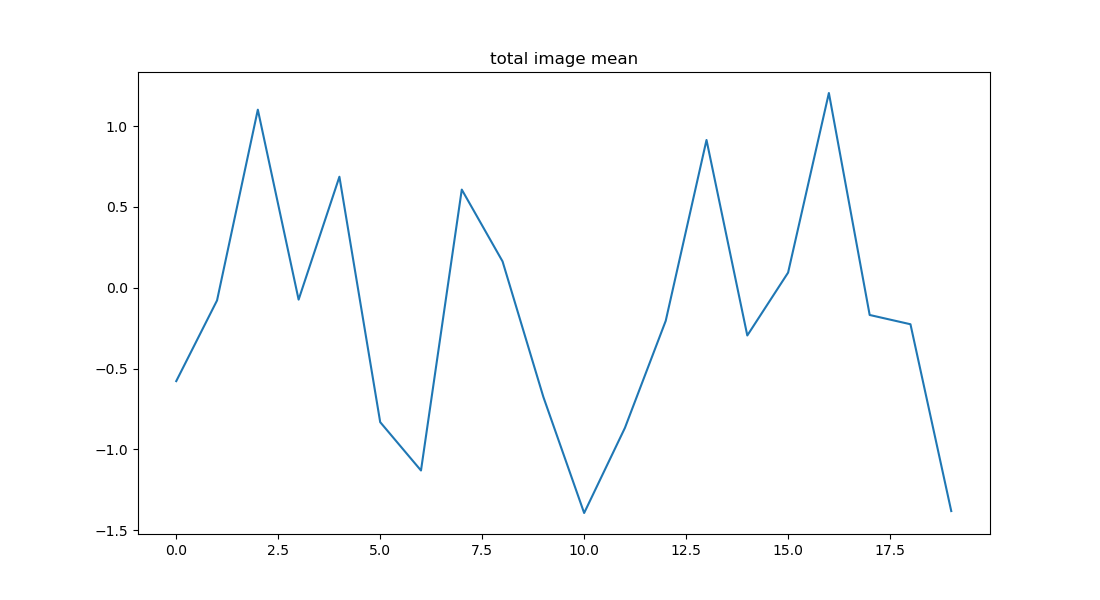

<IPython.core.display.Javascript object>


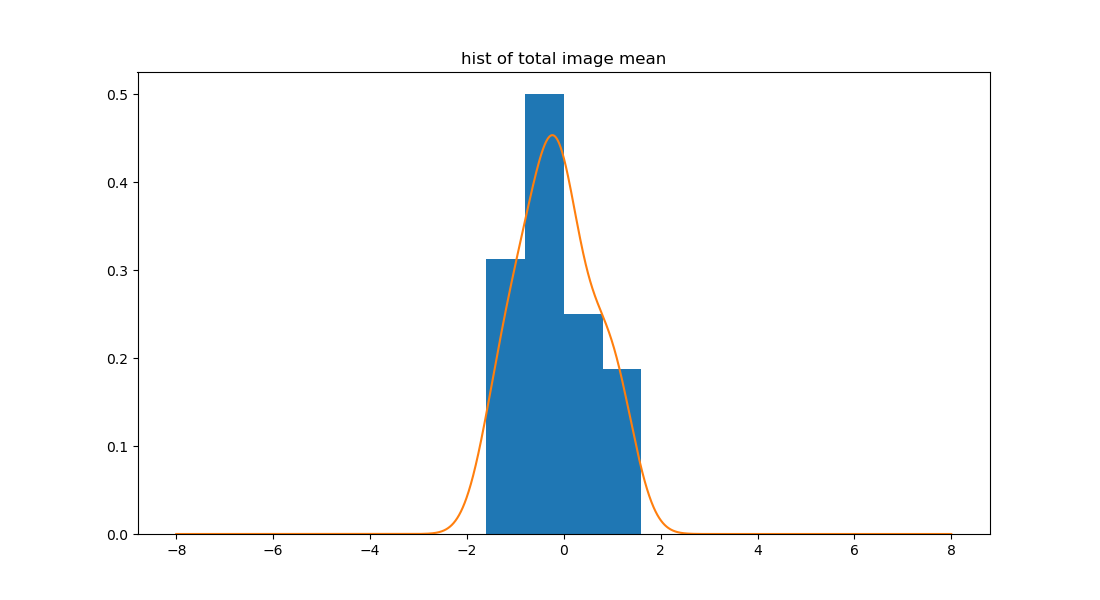

Text(0.5, 1.0, 'hist of total image mean')

In [172]:
plt.figure(figsize=s)

e_mean = np.mean(frame_col_means[:,8:-8], axis=1)

# col_pred = np.array(
#     [
#         0.50 * (np.mean((a - mean_darkframes)[2:-2,:8]) + np.mean((a - mean_darkframes)[2:-2,-8:])) 
#         for a in darkframes
#     ]
# )

from scipy.stats import gaussian_kde

plt.plot(e_mean)
plt.title("total image mean")
# plt.plot(o_mean)
plt.figure(figsize=s)
x = np.linspace(-8,8,21)
xx = np.linspace(np.min(x), np.max(x), len(x) * 100)
plt.hist(e_mean, bins=x, density=True)
plt.plot(xx, gaussian_kde(e_mean)(xx))
plt.title("hist of total image mean")

column noise residual uncorrected: 0.5731124877929688


<IPython.core.display.Javascript object>


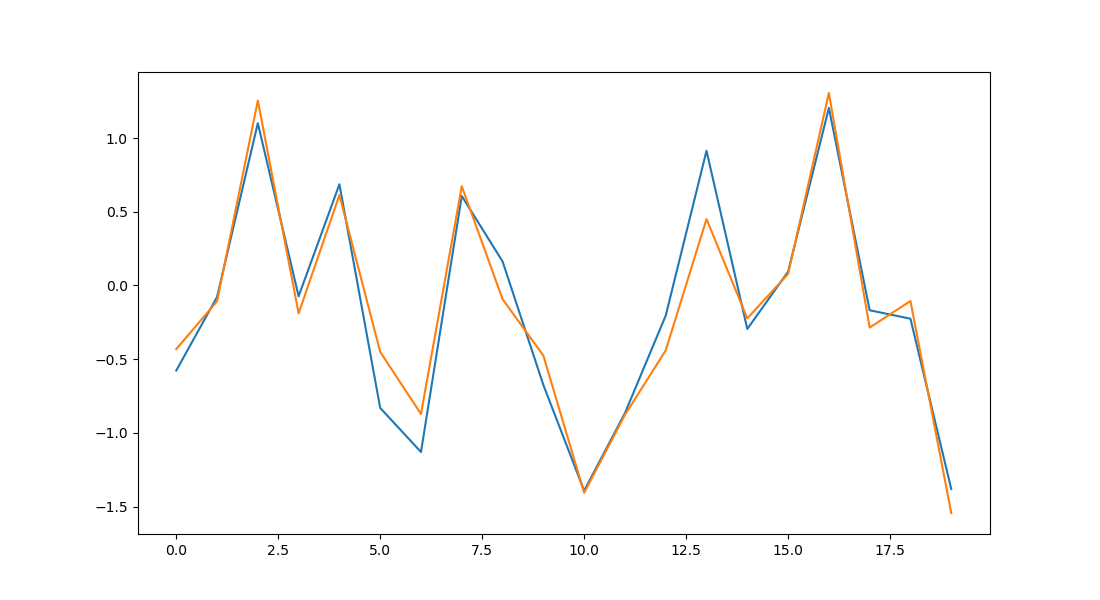

[-1.97571565  3.81459077 -1.96711288  3.14328997  6.15009359 13.97921335
 -3.74323777 -7.57049209 -1.19009371  3.8392544  -6.67913414 -2.14203721
 -3.722818    0.88683183 -4.01552861 -0.53330602 -0.33820237]
column noise residual corrected 0.036331910518532955


In [173]:
def test(col_means):
    plt.figure(figsize=s)
    black_col_mean = np.hstack([col_means[:,:8], col_means[:,-8:]])
    c_mean = np.mean(col_means[:,8:-8], axis=1)
    k = black_col_mean.shape[-1]

    def col_predictor(black_col_mean, *args):
        A = np.array(args[:k])
        b = args[-1]
        v = np.matmul(A, black_col_mean.T)
        # v = np.mean(black_col_mean, axis=1) * args[0]
        return v + b

    from scipy.optimize import curve_fit

    popt, _ = curve_fit(col_predictor, black_col_mean, c_mean, p0=[0.1] * k + [0.0])
    print(popt)
    plt.plot(c_mean)
    plt.plot(col_predictor(black_col_mean, *popt))
    print("column noise residual corrected", np.sum((col_predictor(black_col_mean, *popt) - c_mean)**2) / len(c_mean))

    
print("column noise residual uncorrected:", np.sum((e_mean - np.mean(e_mean))**2) / len(e_mean))
test(frame_col_means)

<IPython.core.display.Javascript object>


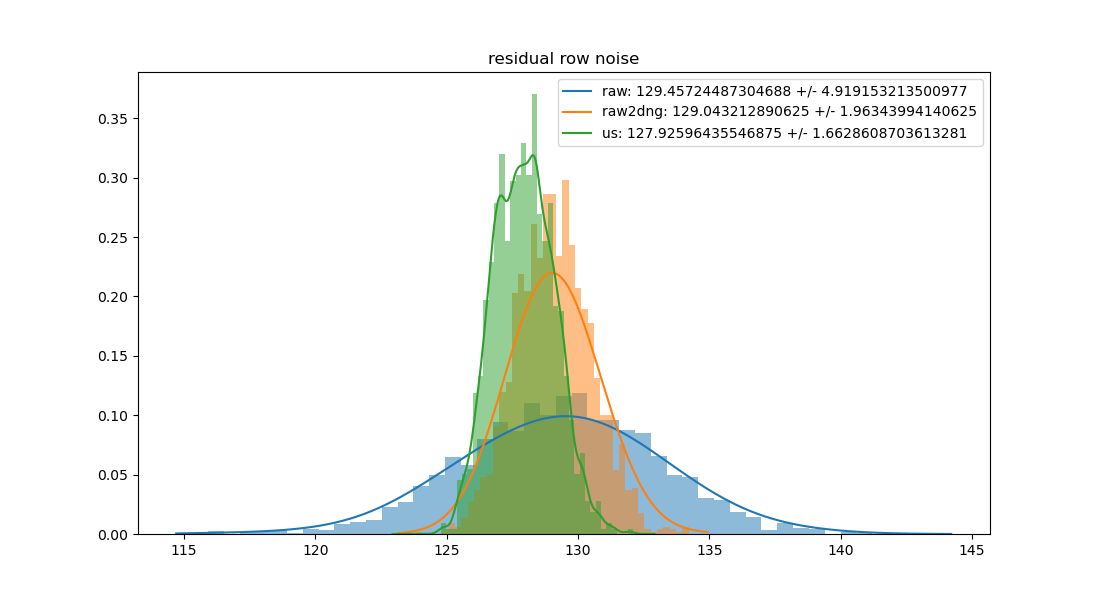

In [40]:
from scipy.stats import gaussian_kde

def save_raw12(frame, filename):
    frame = np.ravel(np.round(frame).astype(np.uint16))
    out = np.zeros(len(frame) * 3 // 2, dtype=np.uint8)
    out[::3] = frame[::2] >> 4
    out[1::3] = frame[::2] << 4
    out[1::3] += frame[1::2] >> 8
    out[2::3] = frame[1::2] & 0xff
    out.tofile(filename)
    
def load_raw12(filename):
    i = np.fromfile(filename, dtype=np.uint8).astype(np.uint16)
    f = np.ravel(np.zeros_like(darkframes[0]))
    f[::2] = (i[::3] << 4) + (i[1::3] >> 4)
    f[1::2] = ((i[1::3] & 0xf) << 8) + i[2::3]
    return f.reshape(darkframes[0].shape)

frame = 150

a = darkframes[frame] - mean_darkframes + 128

save_raw12(a, "/tmp/test.raw12")
b = load_raw12("/tmp/out.raw12")

# c, _ = correct_frame(frame, trained_linear_predictor_col_means_green)
# c, _ = correct_frame(frame, trained_many_means)
c, _ = correct_frame(frame, trained_pipe)
# c, _ = correct_frame(frame, tf_predictor)
c += 128

def ana(frame, title):
    frame = frame[2:-2]
    row_means = np.mean(frame, axis=1)
    row_μ = np.median(row_means)
    row_σ = iqr(row_means)
    nσ = 3
    x = np.linspace(row_μ - nσ * row_σ, row_μ + nσ * row_σ, 50)
    xx = np.linspace(np.min(x), np.max(x), len(x) * 100)
    line = plt.plot(xx, gaussian_kde(row_means, bw_method=row_σ * 0.1)(xx), label=f"{title}: {row_μ} +/- {row_σ}")
    plt.hist(row_means, bins=x, color=line[0].get_color(), density=True, alpha=0.5)
plt.figure(figsize=s)
ana(a, "raw")
ana(b, "raw2dng")
ana(c, "us")
plt.title("residual row noise")
plt.legend()

# frame_fig(a, title="raw")
# frame_fig(b, title="raw2dng")

In [26]:
X = []
y = []
for d in darkframes:
    d = (d - mean_darkframes)[2:-2]
    X.append((np.hstack([np.mean(d[:,:8], axis=0), np.mean(d[:,-8:], axis=0)])))
    y.append(np.mean(d[:,8:-8]))
    
X = np.vstack(X)
y = np.array(y)

#from sklearn.datasets import make_regression

#X, y = make_regression(n_samples=200)
print(X.shape)
print(y.shape)
#help(make_regression)

(507, 16)
(507,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# pca = PCA()
# pca.fit(X_train)
# plt.figure(figsize=s)
# plt.plot(pca.explained_variance_ratio_)

pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
#        ('pac', PCA(n_components=80)),
        ('mlp', MLPRegressor(
            hidden_layer_sizes=(10,10,10,10),
#            alpha=5, 
            max_iter=5000, 
            solver="adam",
            activation="relu"
        )),
    ]
)
pipe.fit(X_train, y_train)

In [ ]:
# X_test = X_train
# y_test = y_train
pipe.score(X_test, y_test)
print(np.sum((pipe.predict(X_test) - y_test)**2) / len(y_test))
print(np.sum((pipe.predict(X_train) - y_train)**2) / len(y_test))
print(np.sum(y_test**2) / len(y_test))
plt.figure(figsize=s)
plt.plot(y_test)
plt.plot(pipe.predict(X_test))

In [146]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

In [162]:
X, y = get_data_for_nrows(nrows=2, with_col_means=True, with_green_diff=True)
# y = y - trained_many_means(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)
# train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

tf_scaler = StandardScaler()
tf_scaler.fit(X_train)
X_train = tf_scaler.transform(X_train)
X_test = tf_scaler.transform(X_test)

class HP(kt.HyperModel):
    def build(self, hp):
        model = keras.Sequential()
        hp_units = hp.Int('layer_size', min_value=16, max_value=512, step=32)
        hp_layer_number = hp.Choice('layer_number', values=[1,2,3,4,5,6,7,8,9,10])
        for _ in range(hp_layer_number):
            model.add(keras.layers.Dense(units=hp_units, activation='relu'))
        model.add(keras.layers.Dense(1))

        hp_learning_rate = hp.Choice(
            'learning_rate', 
            values=[1e-2, 1e-3, 1e-4, 1e-5]
        )

        model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                      loss="mean_squared_error",
                      metrics=['mean_squared_error'])

        return model
    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Int('batch_size', min_value=50, max_value=500, step=50),
            **kwargs
        )


tuner = kt.Hyperband(HP(),
                     objective='val_loss',
                     max_epochs=100,
                     factor=3,
                     hyperband_iterations=10,
                     directory='my_dir',
                     project_name='intro_to_kt')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps)

if False:
    history = model.fit(
        X_train,
        y_train,
        validation_split=0.2,
        batch_size=100,
        verbose=1, epochs=100)


    def plot_loss(history):
      plt.plot(history.history['loss'], label='loss')
      plt.plot(history.history['val_loss'], label='val_loss')
      plt.ylim([0, 10])
      plt.xlabel('Epoch')
      plt.ylabel('Error [MPG]')
      plt.legend()
      plt.grid(True)

    plt.figure(figsize=s)
    plot_loss(history)
    model.evaluate(X_test, y_test, batch_size=65535, verbose=1)

Trial 387 Complete [00h 01m 12s]
val_loss: 0.6540364623069763

Best val_loss So Far: 0.20751668512821198
Total elapsed time: 04h 57m 06s

Search: Running Trial #388

Value             |Best Value So Far |Hyperparameter
336               |80                |layer_size
2                 |4                 |layer_number
0.001             |0.001             |learning_rate
250               |100               |batch_size
12                |100               |tuner/epochs
4                 |34                |tuner/initial_epoch
4                 |2                 |tuner/bracket
2                 |2                 |tuner/round
0358              |0228              |tuner/trial_id

Epoch 5/12
875/875 [==============================] - 5s 5ms/step - loss: 0.7322 - mean_squared_error: 0.7322 - val_loss: 0.6860 - val_mean_squared_error: 0.6860
Epoch 6/12
875/875 [==============================] - 4s 5ms/step - loss: 0.6733 - mean_squared_error: 0.6733 - val_loss: 0.6735 - val_mean_squared_error

KeyboardInterrupt: 

In [132]:
v = model.predict(X_test, batch_size=1024 * 1024).flatten()
print(np.sum((v - y_test)**2) / len(y_train))
tf_predictor = lambda x: model.predict(tf_scaler.transform(x), batch_size=1024*1024).flatten()
tf_predictor.__name__ = "tf_predictor"
tf_predictor.nrows = 2
tf_predictor.with_col_means = True
tf_predictor.with_green_diff = True

1/1 [==============================] - 0s 190ms/step
0.4348413434093379


In [164]:
X, y = get_data_for_nrows(nrows=2, with_col_means=True, with_green_diff=True)
np.save("X.npy", X)
np.save("y.npy", y)